<a href="https://colab.research.google.com/github/karthikeya172/Kodikon/blob/main/Copy_of_kodikon_supermemory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas networkx opencv-python ultralytics matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.1 MB/s eta 0:00:00


In [3]:

!python -m venv venv

Error: Command '['/content/venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.


In [4]:
import pandas as pd
import networkx as nx
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.makedirs('/content/drive/My Drive/kodikonJAI/dataset/baggage_images', exist_ok=True)


In [ ]:
import os

# Base project folder
project_folder = "/content/kodikonJAI"
os.makedirs(project_folder, exist_ok=True)

# Dataset folders
os.makedirs(f"{project_folder}/dataset/baggage_images", exist_ok=True)
os.makedirs(f"{project_folder}/dataset/event_images", exist_ok=True)

# Results folders
os.makedirs(f"{project_folder}/results", exist_ok=True)
os.makedirs(f"{project_folder}/results/visualization", exist_ok=True)

# Scripts or notebook folder
os.makedirs(f"{project_folder}/notebooks", exist_ok=True)

print("Folders created successfully!")


Folders created successfully!


In [ ]:
import os
print(os.listdir('/content/kodikonJAI/dataset/baggage_images'))


[]


In [ ]:
import os
print(os.listdir('/content/drive/My Drive/kodikonJAI/dataset/baggage_images'))


['Recording-2025-03-26-151918_mp4-0013_jpg.rf.4369ae43f319190c99e9681fff3d0bbc.jpg', 'test-video-croped-Made-with-Clipchamp_mp4-0084_jpg.rf.8696b8a23d54f6a04dc5abf7c964d066.jpg', 'frame_175_jpg.rf.59117172e7ba097dc4e0d2c5f9b6203b.jpg', 'frame_12825_jpg.rf.b6dd40d0f559134ef62c06797daaadf7.jpg', 'frame_6570_jpg.rf.ed03558a62c0ad5965580539c3cb0eb9.jpg', 'frame_6615_jpg.rf.53f17b97aea07ec21afa7d8a85697a0e.jpg', 'frame_9675_jpg.rf.c4b266dbb7cc6a5f0c447727476927e1.jpg', 'frame_6480_jpg.rf.68c2589c6acc208d310af28765ca4186.jpg', 'frame_1470_jpg.rf.8f1e53851f113807a939927f08b46649.jpg', 'frame_1400_jpg.rf.0f55fc1a0eb6e4ef365d4dec55c0b541.jpg', 'frame_10935_jpg.rf.b5818dd1dfb1b172af54724bfc4521e2.jpg', 'test-video-croped-Made-with-Clipchamp_mp4-0047_jpg.rf.295f3fad0f80b9725f7ed7ecc8f43f18.jpg', '2025_01_25_-dusserdorf-7-min_mp4-0061_jpg.rf.b7a355581fdf811dca790d91f729a8ab.jpg', 'frame_560_jpg.rf.029deb403448672ed47c63f4e9a81d30.jpg', 'frame_9990_jpg.rf.3d96206c5ba6a062c316d8cac7f0d7d7.jpg', 'fra

In [ ]:
import os

print("Train images:", os.listdir('/content/drive/My Drive/kodikonJAI/dataset/train/images')[:5])
print("Valid images:", os.listdir('/content/drive/My Drive/kodikonJAI/dataset/valid/images')[:5])
print("Test images:", os.listdir('/content/drive/My Drive/kodikonJAI/dataset/test/images')[:5])


Train images: ['frame_11025_jpg.rf.fa937309d4f859f92e152c616f80f4c4.jpg', 'frame_11430_jpg.rf.42aed8b50681e3bbb9c204103b674828.jpg', 'frame_12960_jpg.rf.9266b823ef61d82b20d71445cc46f15f.jpg', 'frame_11115_jpg.rf.dcc7dbd028735cfa00cfc495a128f2ae.jpg', 'frame_12870_jpg.rf.e2180ca653eb6e4cbdcf9732dc84a667.jpg']
Valid images: ['test-video-croped-Made-with-Clipchamp_mp4-0029_jpg.rf.9aa79368fd8e450821297ed5e3706118.jpg', 'Recording-2025-03-26-151918_mp4-0017_jpg.rf.5625bfb01357e4412207743aaffe277e.jpg', 'test-video-croped-Made-with-Clipchamp_mp4-0142_jpg.rf.cd4e893cab81b1debda6f1e9727799cd.jpg', 'test-video-croped-Made-with-Clipchamp_mp4-0156_jpg.rf.1453667357430dae5500c9f018f6cd25.jpg', 'test-video-croped-Made-with-Clipchamp_mp4-0009_jpg.rf.892ee9269ad1d9fbc154158f7256d134.jpg']
Test images: ['frame_1470_jpg.rf.8f1e53851f113807a939927f08b46649.jpg', 'frame_6255_jpg.rf.64899add84f07a1681d10981e894edd6.jpg', 'frame_1120_jpg.rf.8d1a065e9030454a5b7e43fb324264eb.jpg', 'frame_1575_jpg.rf.ad242e25

In [6]:
from ultralytics import YOLO

# Give the correct path to your data.yaml
DATA_YAML_PATH = '/content/drive/My Drive/kodikonJAI/dataset/data.yaml'

# Use a small YOLO model for speed (yolov8n.pt)
model = YOLO('yolov8n.pt')

# Train
results = model.train(
    data=DATA_YAML_PATH,
    epochs=10,         # Increase if time allows for better accuracy
    imgsz=416,         # You can use 640 for higher accuracy (but longer time)
    device=0           # GPU
)

# This will produce a weights file here:
# /content/runs/detect/train/weights/best.pt


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/My Drive/kodikonJAI/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

In [8]:
# Load your trained model for inference
trained_model = YOLO('/content/runs/detect/train/weights/best.pt')


In [10]:
from ultralytics import YOLO
import os
import pandas as pd

# Load pretrained YOLO model (or your custom trained model)
model = YOLO('/content/runs/detect/train/weights/best.pt')
 # Use pretrained, or your_model.pt if trained

# Set up correct class mapping from your data.yaml
class_mapping = {
    0: 'other',    # 'a' (ignore or filter out)
    1: 'luggage',  # This is what you want
    2: 'person'    # This is what you want
}

# Path to your baggage images
img_folder = '/content/drive/My Drive/kodikonJAI/dataset/baggage_images'
img_files = sorted([os.path.join(img_folder, f) for f in os.listdir(img_folder)
                    if f.endswith(('.jpg', '.png'))])

print(f"Found {len(img_files)} images")

# Store detections
detections = []

# Run YOLO inference on each image
for img_path in img_files:
    results = model(img_path, conf=0.5)  # conf=0.5 filters low confidence

    img_name = os.path.basename(img_path)

    # Extract boxes from results
    boxes = results[0].boxes

    if len(boxes) > 0:
        for box in boxes:
            class_id = int(box.cls.item())
            confidence = float(box.conf.item())
            xyxy = box.xyxy[0].cpu().numpy()  # [x1, y1, x2, y2]

            detection = {
                'image_name': img_name,
                'class_id': class_id,
                'class_label': class_mapping.get(class_id, 'unknown'),
                'confidence': confidence,
                'x1': float(xyxy[0]),
                'y1': float(xyxy[1]),
                'x2': float(xyxy[2]),
                'y2': float(xyxy[3]),
                'bbox_width': float(xyxy[2] - xyxy[0]),
                'bbox_height': float(xyxy[3] - xyxy[1])
            }
            detections.append(detection)
    else:
        print(f"No detections in {img_name}")

print(f"\nTotal detections: {len(detections)}")


Found 573 images

image 1/1 /content/drive/My Drive/kodikonJAI/dataset/baggage_images/2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg: 416x416 2 luggages, 14 persons, 6.6ms
Speed: 1.5ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/drive/My Drive/kodikonJAI/dataset/baggage_images/2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.c27add4b7210652ed5b0e8e5aee1dd66.jpg: 416x416 2 luggages, 17 persons, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/drive/My Drive/kodikonJAI/dataset/baggage_images/2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.d3ea7ce4c802106b3bd713973a39dfcd.jpg: 416x416 1 luggage, 12 persons, 6.7ms
Speed: 1.5ms preprocess, 6.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)

image 1/1 /content/drive/My Drive/kodikonJAI/dataset/baggage_images/2025_01_25_-dusserdorf-7-min_mp4-0019_jpg.rf.58ce5630a00c

In [11]:
# Create pandas DataFrame
df = pd.DataFrame(detections)

# Display summary
print("\n=== Detection Summary ===")
print(df['class_label'].value_counts())
print("\n=== Sample Detections ===")
print(df.head(10))

# Save to CSV
output_path = '/content/drive/My Drive/kodikonJAI/results/detections.csv'
df.to_csv(output_path, index=False)
print(f"\n✅ Saved to {output_path}")

# Also save statistics
summary = {
    'total_images': len(img_files),
    'total_detections': len(df),
    'luggage_count': len(df[df['class_label'] == 'luggage']),
    'person_count': len(df[df['class_label'] == 'person']),
    'other_count': len(df[df['class_label'] == 'other'])
}

for key, val in summary.items():
    print(f"{key}: {val}")



=== Detection Summary ===
class_label
person     4634
luggage     947
Name: count, dtype: int64

=== Sample Detections ===
                                          image_name  class_id class_label  \
0  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   
1  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   
2  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   
3  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         1     luggage   
4  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   
5  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   
6  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   
7  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   
8  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   
9  2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7...         2      person   

   confidence    

In [12]:
# Check detection distribution
print(df.groupby(['image_name', 'class_label']).size())

# Show images with both person and luggage
images_with_both = df[df['image_name'].isin(
    df[df['class_label'] == 'luggage']['image_name']
) & df['image_name'].isin(
    df[df['class_label'] == 'person']['image_name']
)]['image_name'].unique()

print(f"\nImages with BOTH person and luggage: {len(images_with_both)}")
print(images_with_both[:10])


image_name                                                                                  class_label
2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg           luggage         2
                                                                                            person         14
2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.c27add4b7210652ed5b0e8e5aee1dd66.jpg           luggage         2
                                                                                            person         17
2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.d3ea7ce4c802106b3bd713973a39dfcd.jpg           luggage         1
                                                                                                           ..
test-video-croped-Made-with-Clipchamp_mp4-0154_jpg.rf.55c1a9e5e4c28c948ed14d1cfc8ddb21.jpg  person          8
test-video-croped-Made-with-Clipchamp_mp4-0154_jpg.rf.e9164fa4b61a181da646e2d647a48a21.jpg  person          6
test-video-crope

In [13]:
import pandas as pd
import networkx as nx
import numpy as np

# Load your detections CSV
df = pd.read_csv('/content/drive/My Drive/kodikonJAI/results/detections.csv')

print(f"Total detections: {len(df)}")
print(df['class_label'].value_counts())

# Create a directed graph
G = nx.DiGraph()

# Group detections by image
for image_name, group in df.groupby('image_name'):
    print(f"\n=== Processing {image_name} ===")

    # Store a mapping from original df index to node_id for easy lookup when creating edges
    idx_to_node_id = {}

    # Add nodes for each detection in this image
    for idx, row in group.iterrows():
        node_id = f"{row['class_label']}_{idx}_{image_name}"
        idx_to_node_id[idx] = node_id  # Store the mapping

        # Node attributes
        G.add_node(
            node_id,
            class_label=row['class_label'],
            image_name=image_name,
            confidence=row['confidence'],
            x1=row['x1'], y1=row['y1'],
            x2=row['x2'], y2=row['y2'],
            bbox_width=row['bbox_width'],
            bbox_height=row['bbox_height']
        )

    # Create edges (spatial relationships) within the same image
    # Iterate over the group DataFrame using original indices and rows as Series
    group_items = list(group.iterrows()) # Convert to list of (index, Series) tuples

    for i in range(len(group_items)): # i is the index in group_items
        idx_i, det_i = group_items[i]  # det_i is a Pandas Series for the i-th detection
        node_i = idx_to_node_id[idx_i]

        for j in range(i + 1, len(group_items)): # j is the index in group_items
            idx_j, det_j = group_items[j]  # det_j is a Pandas Series for the j-th detection
            node_j = idx_to_node_id[idx_j]

            # Calculate bounding box distance (center-to-center)
            cx_i = (det_i['x1'] + det_i['x2']) / 2
            cy_i = (det_i['y1'] + det_i['y2']) / 2
            cx_j = (det_j['x1'] + det_j['x2']) / 2
            cy_j = (det_j['y1'] + det_j['y2']) / 2

            distance = np.sqrt((cx_i - cx_j)**2 + (cy_i - cy_j)**2)

            # Define spatial relationship
            relationship = "near" if distance < 200 else "far"  # Tune threshold as needed

            G.add_edge(
                node_i, node_j,
                relationship=relationship,
                distance=distance,
                image_name=image_name
            )
            G.add_edge(
                node_j, node_i,
                relationship=relationship,
                distance=distance,
                image_name=image_name
            )

print(f"\n✅ Graph built!")
print(f"Total nodes: {G.number_of_nodes()}")
print(f"Total edges: {G.number_of_edges()}")

Total detections: 5581
class_label
person     4634
luggage     947
Name: count, dtype: int64

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg ===

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.c27add4b7210652ed5b0e8e5aee1dd66.jpg ===

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.d3ea7ce4c802106b3bd713973a39dfcd.jpg ===

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0019_jpg.rf.58ce5630a00ceff9f4b175790398d53c.jpg ===

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0019_jpg.rf.5e32bda730387dcb5df5b41ed6f4effd.jpg ===

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0019_jpg.rf.e13bfbba0b8f7678447406df1acc5f8f.jpg ===

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0028_jpg.rf.428bdd235e79f379eda24e3cd4a31637.jpg ===

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0028_jpg.rf.a43f4a802df0d19fefe1b4dc40354bd5.jpg ===

=== Processing 2025_01_25_-dusserdorf-7-min_mp4-0028_jpg.rf.f2e5ff98d5698bc77c9285231db81e

In [14]:
# 1. Find all "person-luggage" pairs that are "near" each other
person_luggage_pairs = []
for u, v, data in G.edges(data=True):
    u_class = G.nodes[u]['class_label']
    v_class = G.nodes[v]['class_label']

    if data.get('relationship') == 'near':
        if (u_class == 'person' and v_class == 'luggage') or \
           (u_class == 'luggage' and v_class == 'person'):
            person_luggage_pairs.append({
                'person': u if u_class == 'person' else v,
                'luggage': v if u_class == 'luggage' else u,
                'distance': data['distance'],
                'image': data['image_name']
            })

print(f"\n=== Person-Luggage Pairs (Near) ===")
print(f"Found {len(person_luggage_pairs)} pairs")
print("\nSample pairs:")
for pair in person_luggage_pairs[:5]:
    print(f"  Image: {pair['image']}")
    print(f"    Person: {pair['person']}")
    print(f"    Luggage: {pair['luggage']}")
    print(f"    Distance: {pair['distance']:.2f} pixels\n")

# 2. Find isolated luggage (no nearby person)
isolated_luggage = []
for node in G.nodes():
    if G.nodes[node]['class_label'] == 'luggage':
        neighbors = list(G.neighbors(node))

        # Check if any neighbor is a person and "near"
        has_nearby_person = False
        for neighbor in neighbors:
            if G.nodes[neighbor]['class_label'] == 'person':
                edge_data = G.edges[node, neighbor]
                if edge_data.get('relationship') == 'near':
                    has_nearby_person = True
                    break

        if not has_nearby_person:
            isolated_luggage.append({
                'luggage_id': node,
                'image': G.nodes[node]['image_name'],
                'confidence': G.nodes[node]['confidence']
            })

print(f"\n=== Isolated Luggage (No Nearby Person) ===")
print(f"Found {len(isolated_luggage)} isolated pieces")
print("\nSample:")
for item in isolated_luggage[:5]:
    print(f"  {item['luggage_id']} in {item['image']} (conf: {item['confidence']:.2f})")



=== Person-Luggage Pairs (Near) ===
Found 6448 pairs

Sample pairs:
  Image: 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Person: person_2_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Luggage: person_2_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Distance: 195.88 pixels

  Image: 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Person: person_4_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Luggage: person_4_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Distance: 105.18 pixels

  Image: 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Person: person_5_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Luggage: person_5_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c9

In [15]:
import json

# Convert graph to JSON format for storage/visualization
graph_data = {
    'nodes': [
        {
            'id': node,
            'attributes': dict(G.nodes[node])
        }
        for node in G.nodes()
    ],
    'edges': [
        {
            'source': u,
            'target': v,
            'relationship': data.get('relationship'),
            'distance': data.get('distance')
        }
        for u, v, data in G.edges(data=True)
    ],
    'stats': {
        'total_nodes': G.number_of_nodes(),
        'total_edges': G.number_of_edges(),
        'person_count': len([n for n in G.nodes() if G.nodes[n]['class_label'] == 'person']),
        'luggage_count': len([n for n in G.nodes() if G.nodes[n]['class_label'] == 'luggage']),
        'person_luggage_pairs': len(person_luggage_pairs),
        'isolated_luggage': len(isolated_luggage)
    }
}

# Save
with open('/content/drive/My Drive/kodikonJAI/results/knowledge_graph.json', 'w') as f:
    json.dump(graph_data, f, indent=2)

print("✅ Knowledge graph saved to knowledge_graph.json")
print(f"\nGraph Statistics:")
for key, val in graph_data['stats'].items():
    print(f"  {key}: {val}")


✅ Knowledge graph saved to knowledge_graph.json

Graph Statistics:
  total_nodes: 5581
  total_edges: 58484
  person_count: 4634
  luggage_count: 947
  person_luggage_pairs: 6448
  isolated_luggage: 46


✅ Graph visualization saved!


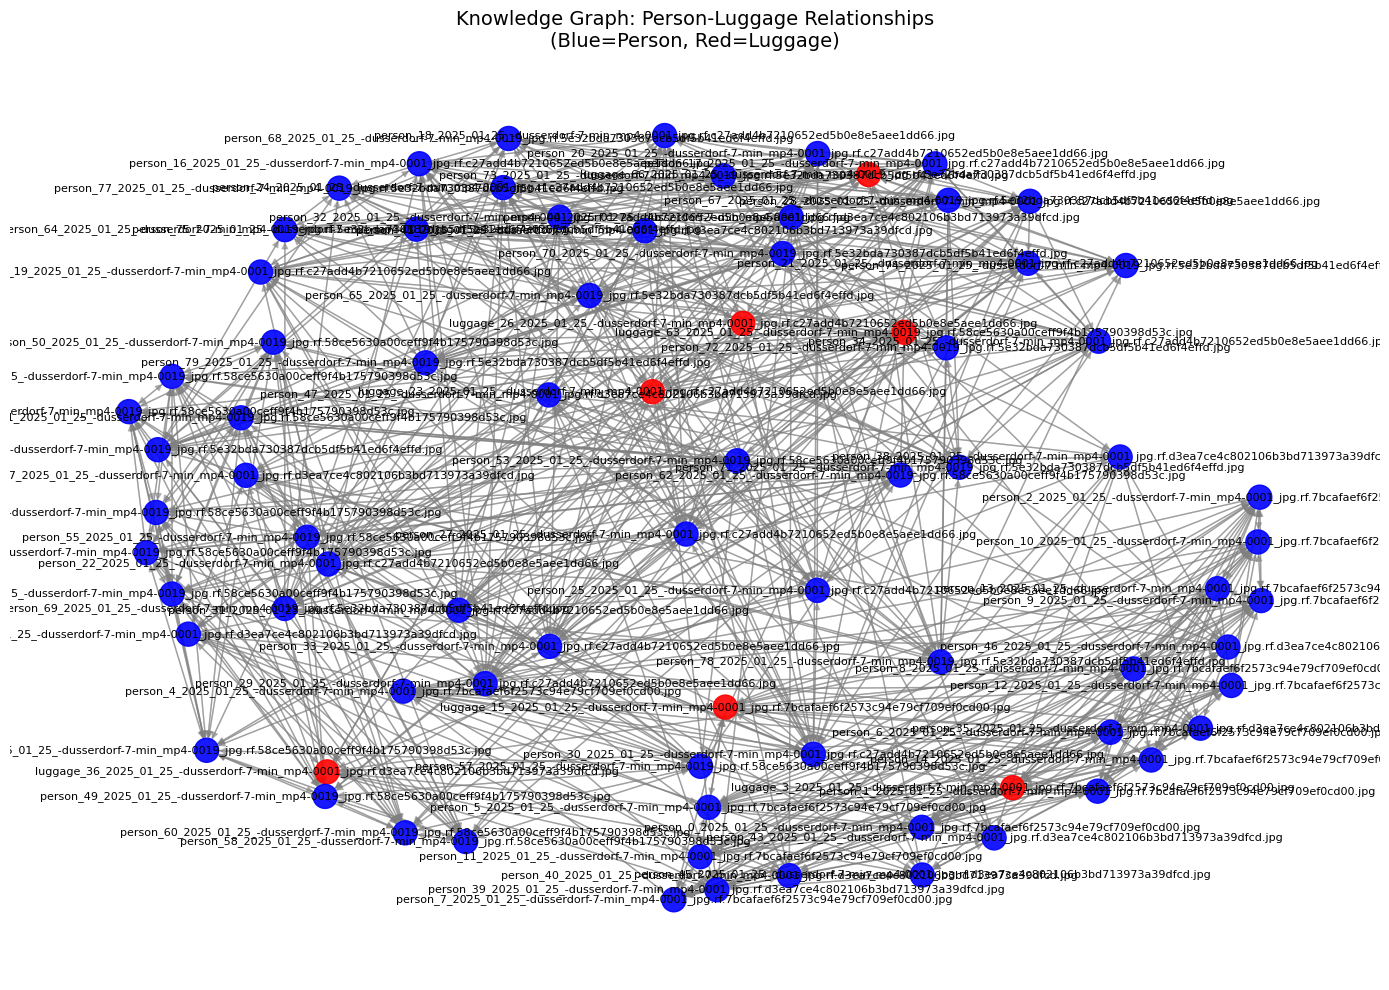

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a smaller subgraph for visualization (all nodes from first 5 images)
images_to_plot = df['image_name'].unique()[:5]
nodes_to_include = [n for n in G.nodes() if G.nodes[n]['image_name'] in images_to_plot]
subgraph = G.subgraph(nodes_to_include).copy()

# Layout
pos = nx.spring_layout(subgraph, k=2, iterations=50, seed=42)

# Color nodes by class
node_colors = []
for node in subgraph.nodes():
    if subgraph.nodes[node]['class_label'] == 'person':
        node_colors.append('blue')
    elif subgraph.nodes[node]['class_label'] == 'luggage':
        node_colors.append('red')
    else:
        node_colors.append('gray')

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=300, ax=ax, alpha=0.9)
nx.draw_networkx_edges(subgraph, pos, edge_color='gray', alpha=0.5, ax=ax, arrows=True)
nx.draw_networkx_labels(subgraph, pos, font_size=8, ax=ax)

ax.set_title("Knowledge Graph: Person-Luggage Relationships\n(Blue=Person, Red=Luggage)", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/kodikonJAI/results/knowledge_graph_visualization.png', dpi=150, bbox_inches='tight')
print("✅ Graph visualization saved!")
plt.show()


In [17]:
# Query: Find luggage with HIGH confidence but NO nearby person
abandoned_luggage = []

for node in G.nodes():
    if G.nodes[node]['class_label'] == 'luggage':
        node_data = G.nodes[node]
        confidence = node_data['confidence']
        image_name = node_data['image_name']

        # Check neighbors
        neighbors = list(G.neighbors(node))
        person_nearby = False

        for neighbor in neighbors:
            if G.nodes[neighbor]['class_label'] == 'person':
                edge_data = G.edges[node, neighbor]
                if edge_data.get('relationship') == 'near':
                    person_nearby = True
                    break

        # High confidence abandoned luggage
        if confidence > 0.85 and not person_nearby:
            abandoned_luggage.append({
                'luggage_node': node,
                'image': image_name,
                'confidence': confidence,
                'x_center': (node_data['x1'] + node_data['x2']) / 2,
                'y_center': (node_data['y1'] + node_data['y2']) / 2
            })

print(f"\n🚨 ABANDONED LUGGAGE ALERTS 🚨")
print(f"Found {len(abandoned_luggage)} high-confidence abandoned bags")
for item in abandoned_luggage[:10]:
    print(f"  Image: {item['image']}")
    print(f"    Confidence: {item['confidence']:.2f}")
    print(f"    Position: ({item['x_center']:.0f}, {item['y_center']:.0f})")



🚨 ABANDONED LUGGAGE ALERTS 🚨
Found 3 high-confidence abandoned bags
  Image: test-video-croped-Made-with-Clipchamp_mp4-0017_jpg.rf.da35129cb4257b5f3406059559f36b11.jpg
    Confidence: 0.89
    Position: (537, 494)
  Image: test-video-croped-Made-with-Clipchamp_mp4-0152_jpg.rf.c8bd75a9c4338b1429bd2a9d36e8eb31.jpg
    Confidence: 0.89
    Position: (586, 401)
  Image: test-video-croped-Made-with-Clipchamp_mp4-0152_jpg.rf.d84c7e949f0580d1b85510217b6b4f5c.jpg
    Confidence: 0.88
    Position: (595, 368)


In [18]:
# Query: Find images with multiple people AND multiple luggage
scene_density = {}

for image_name in df['image_name'].unique():
    image_df = df[df['image_name'] == image_name]

    person_count = len(image_df[image_df['class_label'] == 'person'])
    luggage_count = len(image_df[image_df['class_label'] == 'luggage'])

    # Calculate density (objects per area)
    total_area = 640 * 640  # Assuming 640x640 images
    density = (person_count + luggage_count) / total_area

    scene_density[image_name] = {
        'person_count': person_count,
        'luggage_count': luggage_count,
        'total_objects': person_count + luggage_count,
        'density': density
    }

# Sort by density
sorted_scenes = sorted(scene_density.items(), key=lambda x: x[1]['density'], reverse=True)

print(f"\n📊 TOP CROWDED SCENES 📊")
for image_name, stats in sorted_scenes[:10]:
    print(f"  {image_name}")
    print(f"    People: {stats['person_count']}, Luggage: {stats['luggage_count']}")
    print(f"    Density: {stats['density']:.4f}\n")



📊 TOP CROWDED SCENES 📊
  2025_01_25_-dusserdorf-7-min_mp4-0085_jpg.rf.564f612dd07138630fb0c169bf7042cb.jpg
    People: 24, Luggage: 0
    Density: 0.0001

  2025_01_25_-dusserdorf-7-min_mp4-0192_jpg.rf.3170cf7358df39e89d54943471c8df7c.jpg
    People: 23, Luggage: 1
    Density: 0.0001

  2025_01_25_-dusserdorf-7-min_mp4-0060_jpg.rf.0a7c4549f96452bbf3c5fe7bb90e8c8b.jpg
    People: 23, Luggage: 0
    Density: 0.0001

  2025_01_25_-dusserdorf-7-min_mp4-0060_jpg.rf.cdf05d99b6154291b63dcaf28326ff4c.jpg
    People: 22, Luggage: 1
    Density: 0.0001

  2025_01_25_-dusserdorf-7-min_mp4-0089_jpg.rf.3927924f552a46a02df59a77930abe4b.jpg
    People: 23, Luggage: 0
    Density: 0.0001

  2025_01_25_-dusserdorf-7-min_mp4-0102_jpg.rf.cc737213282f939239f55082aed21ec1.jpg
    People: 22, Luggage: 0
    Density: 0.0001

  2025_01_25_-dusserdorf-7-min_mp4-0113_jpg.rf.316a2e4943cc37a97e13b63d504c543d.jpg
    People: 21, Luggage: 0
    Density: 0.0001

  2025_01_25_-dusserdorf-7-min_mp4-0167_jpg.rf.55393

In [19]:
# Query: Find luggage that is near multiple different people (possible handoff/exchange)
suspicious_patterns = []

for node in G.nodes():
    if G.nodes[node]['class_label'] == 'luggage':
        neighbors = list(G.neighbors(node))
        nearby_people = [n for n in neighbors
                        if G.nodes[n]['class_label'] == 'person'
                        and G.edges[node, n].get('relationship') == 'near']

        # If multiple people near one luggage
        if len(nearby_people) > 1:
            suspicious_patterns.append({
                'luggage': node,
                'image': G.nodes[node]['image_name'],
                'people_nearby': len(nearby_people),
                'confidence': G.nodes[node]['confidence']
            })

print(f"\n⚠️  SUSPICIOUS PATTERNS (Multi-Person Luggage) ⚠️")
print(f"Found {len(suspicious_patterns)} potential handoffs/exchanges")
for item in suspicious_patterns[:5]:
    print(f"  Image: {item['image']}")
    print(f"    Luggage: {item['luggage']}")
    print(f"    People nearby: {item['people_nearby']}")



⚠️  SUSPICIOUS PATTERNS (Multi-Person Luggage) ⚠️
Found 722 potential handoffs/exchanges
  Image: 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Luggage: luggage_3_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    People nearby: 6
  Image: 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    Luggage: luggage_15_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.7bcafaef6f2573c94e79cf709ef0cd00.jpg
    People nearby: 7
  Image: 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.c27add4b7210652ed5b0e8e5aee1dd66.jpg
    Luggage: luggage_23_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.c27add4b7210652ed5b0e8e5aee1dd66.jpg
    People nearby: 7
  Image: 2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.c27add4b7210652ed5b0e8e5aee1dd66.jpg
    Luggage: luggage_26_2025_01_25_-dusserdorf-7-min_mp4-0001_jpg.rf.c27add4b7210652ed5b0e8e5aee1dd66.jpg
    People nearby: 6
  Image: 2025_01_25_-dusserdorf-7-min_m

In [20]:
# Save results for presentation
results_summary = {
    'total_images': len(df['image_name'].unique()),
    'total_detections': len(df),
    'total_persons': len(df[df['class_label'] == 'person']),
    'total_luggage': len(df[df['class_label'] == 'luggage']),
    'abandoned_luggage_count': len(abandoned_luggage),
    'suspicious_patterns_count': len(suspicious_patterns),
    'crowded_scenes_count': len([s for s in sorted_scenes if s[1]['total_objects'] > 5])
}

# Save as JSON
import json
with open('/content/drive/My Drive/kodikonJAI/results/summary_report.json', 'w') as f:
    json.dump(results_summary, f, indent=2)

print("\n📈 SUMMARY REPORT")
for key, val in results_summary.items():
    print(f"  {key}: {val}")



📈 SUMMARY REPORT
  total_images: 572
  total_detections: 5581
  total_persons: 4634
  total_luggage: 947
  abandoned_luggage_count: 3
  suspicious_patterns_count: 722
  crowded_scenes_count: 486


In [ ]:
// extra stuff

SyntaxError: invalid syntax (ipython-input-950263707.py, line 1)

In [21]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import json
import os

# ============== LOAD DATA ==============
df = pd.read_csv('/content/drive/My Drive/kodikonJAI/results/detections.csv')
print(f"📊 Dataset Loaded: {len(df)} detections across {df['image_name'].nunique()} images")
print(f"   Person: {len(df[df['class_label'] == 'person'])}")
print(f"   Luggage: {len(df[df['class_label'] == 'luggage'])}")

# ============== BUILD FULL GRAPH ==============
G = nx.DiGraph()

for image_name, group in df.groupby('image_name'):
    # Store a mapping from original df index to node_id for easy lookup when creating edges
    idx_to_node_id = {}

    # Add nodes for each detection in this image
    for idx, row in group.iterrows():
        node_id = f"{row['class_label']}_{idx}_{image_name}"
        idx_to_node_id[idx] = node_id  # Store the mapping

        G.add_node(
            node_id,
            class_label=row['class_label'],
            image_name=image_name,
            confidence=row['confidence'],
            x1=row['x1'], y1=row['y1'],
            x2=row['x2'], y2=row['y2'],
            bbox_width=row['bbox_width'],
            bbox_height=row['bbox_height']
        )

    # Create edges (spatial relationships) within the same image
    group_items = list(group.iterrows()) # Convert to list of (index, Series) tuples

    for i in range(len(group_items)):
        idx_i, det_i = group_items[i]
        node_i = idx_to_node_id[idx_i]

        for j in range(i + 1, len(group_items)):
            idx_j, det_j = group_items[j]
            node_j = idx_to_node_id[idx_j]

            # Calculate bounding box distance (center-to-center)
            cx_i = (det_i['x1'] + det_i['x2']) / 2
            cy_i = (det_i['y1'] + det_i['y2']) / 2
            cx_j = (det_j['x1'] + det_j['x2']) / 2
            cy_j = (det_j['y1'] + det_j['y2']) / 2

            distance = np.sqrt((cx_i - cx_j)**2 + (cy_i - cy_j)**2)

            relationship = "near" if distance < 200 else "far" # Tune threshold as needed

            G.add_edge(node_i, node_j, relationship=relationship, distance=distance, image_name=image_name)
            G.add_edge(node_j, node_i, relationship=relationship, distance=distance, image_name=image_name)

print(f"\n✅ Graph Built: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

📊 Dataset Loaded: 5581 detections across 572 images
   Person: 4634
   Luggage: 947

✅ Graph Built: 5581 nodes, 58484 edges


In [22]:
# ============== QUERY 1: ABANDONED LUGGAGE ==============
abandoned_luggage = []
for node in G.nodes():
    if G.nodes[node]['class_label'] == 'luggage':
        node_data = G.nodes[node]
        confidence = node_data['confidence']
        image_name = node_data['image_name']

        neighbors = list(G.neighbors(node))
        person_nearby = False

        for neighbor in neighbors:
            if G.nodes[neighbor]['class_label'] == 'person':
                if G.edges[node, neighbor].get('relationship') == 'near':
                    person_nearby = True
                    break

        if confidence > 0.85 and not person_nearby:
            abandoned_luggage.append({
                'luggage_node': node,
                'image': image_name,
                'confidence': confidence,
                'x_center': (node_data['x1'] + node_data['x2']) / 2,
                'y_center': (node_data['y1'] + node_data['y2']) / 2
            })

# ============== QUERY 2: PERSON-LUGGAGE PAIRS ==============
person_luggage_pairs = []
for u, v, data in G.edges(data=True):
    u_class = G.nodes[u]['class_label']
    v_class = G.nodes[v]['class_label']

    if data.get('relationship') == 'near':
        if (u_class == 'person' and v_class == 'luggage') or \
           (u_class == 'luggage' and v_class == 'person'):
            person_luggage_pairs.append({
                'person': u if u_class == 'person' else v,
                'luggage': v if u_class == 'luggage' else u,
                'distance': data['distance'],
                'image': data.get('image_name', 'unknown')
            })

# ============== QUERY 3: SCENE DENSITY ==============
scene_density = {}
for image_name in df['image_name'].unique():
    image_df = df[df['image_name'] == image_name]
    person_count = len(image_df[image_df['class_label'] == 'person'])
    luggage_count = len(image_df[image_df['class_label'] == 'luggage'])
    density = (person_count + luggage_count) / (640 * 640)

    scene_density[image_name] = {
        'person_count': person_count,
        'luggage_count': luggage_count,
        'total_objects': person_count + luggage_count,
        'density': density
    }

sorted_scenes = sorted(scene_density.items(), key=lambda x: x[1]['density'], reverse=True)

# ============== QUERY 4: SUSPICIOUS PATTERNS ==============
suspicious_patterns = []
for node in G.nodes():
    if G.nodes[node]['class_label'] == 'luggage':
        neighbors = list(G.neighbors(node))
        nearby_people = [n for n in neighbors
                        if G.nodes[n]['class_label'] == 'person'
                        and G.edges[node, n].get('relationship') == 'near']

        if len(nearby_people) > 1:
            suspicious_patterns.append({
                'luggage': node,
                'image': G.nodes[node]['image_name'],
                'people_nearby': len(nearby_people),
                'confidence': G.nodes[node]['confidence']
            })

print(f"\n🚨 ABANDONED LUGGAGE: {len(abandoned_luggage)} items")
print(f"👥 PERSON-LUGGAGE PAIRS: {len(person_luggage_pairs)} pairs")
print(f"⚠️  SUSPICIOUS PATTERNS: {len(suspicious_patterns)} detected")
print(f"📊 CROWDED SCENES (>5 objects): {len([s for s in sorted_scenes if s[1]['total_objects'] > 5])}")



🚨 ABANDONED LUGGAGE: 3 items
👥 PERSON-LUGGAGE PAIRS: 6448 pairs
⚠️  SUSPICIOUS PATTERNS: 722 detected
📊 CROWDED SCENES (>5 objects): 486


In [ ]:
// visualization part

SyntaxError: invalid syntax (ipython-input-54005703.py, line 1)

/tmp/ipython-input-519523350.py:63: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-519523350.py:63: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/tmp/ipython-input-519523350.py:64: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans Mono.
  plt.savefig('/content/drive/My Drive/kodikonJAI/results/01_stats_dashboard.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-519523350.py:64: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans Mono.
  plt.savefig('/content/drive/My Drive/kodikonJAI/results/01_stats_dashboard.png', dpi=300, bbox_inches='tight')


✅ Saved: 01_stats_dashboard.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


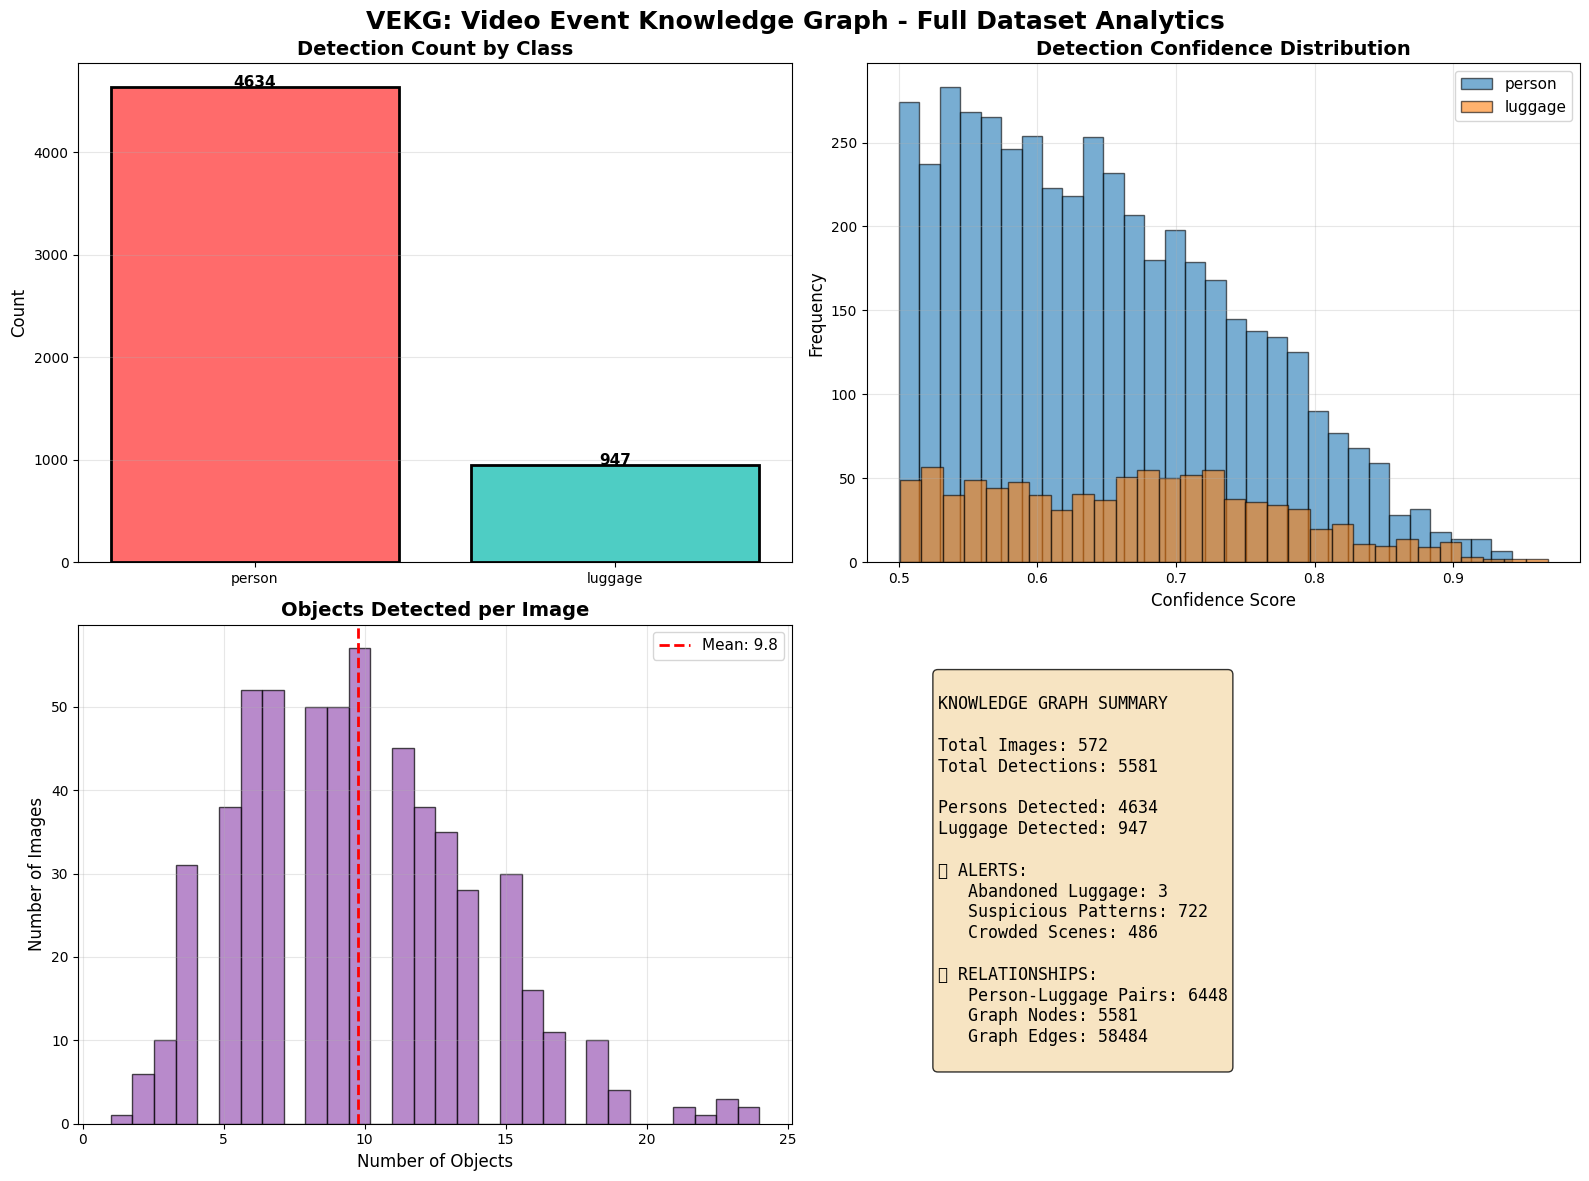

In [23]:
# ============== VISUALIZATION 1: STATS DASHBOARD ==============
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('VEKG: Video Event Knowledge Graph - Full Dataset Analytics', fontsize=18, fontweight='bold')

# 1. Class Distribution
ax = axes[0, 0]
class_counts = df['class_label'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#95A5A6']
ax.bar(class_counts.index, class_counts.values, color=colors, edgecolor='black', linewidth=2)
ax.set_title('Detection Count by Class', fontsize=14, fontweight='bold')
ax.set_ylabel('Count', fontsize=12)
for i, v in enumerate(class_counts.values):
    ax.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)
ax.grid(axis='y', alpha=0.3)

# 2. Confidence Distribution
ax = axes[0, 1]
for class_label in ['person', 'luggage']:
    data = df[df['class_label'] == class_label]['confidence']
    ax.hist(data, bins=30, alpha=0.6, label=class_label, edgecolor='black')
ax.set_title('Detection Confidence Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Confidence Score', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

# 3. Objects Per Image
ax = axes[1, 0]
objects_per_image = df.groupby('image_name').size()
ax.hist(objects_per_image, bins=30, color='#9B59B6', edgecolor='black', alpha=0.7)
ax.set_title('Objects Detected per Image', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Objects', fontsize=12)
ax.set_ylabel('Number of Images', fontsize=12)
ax.axvline(objects_per_image.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {objects_per_image.mean():.1f}')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

# 4. Alert Summary
ax = axes[1, 1]
ax.axis('off')
summary_text = f"""
KNOWLEDGE GRAPH SUMMARY

Total Images: {df['image_name'].nunique()}
Total Detections: {len(df)}

Persons Detected: {len(df[df['class_label'] == 'person'])}
Luggage Detected: {len(df[df['class_label'] == 'luggage'])}

🚨 ALERTS:
   Abandoned Luggage: {len(abandoned_luggage)}
   Suspicious Patterns: {len(suspicious_patterns)}
   Crowded Scenes: {len([s for s in sorted_scenes if s[1]['total_objects'] > 5])}

👥 RELATIONSHIPS:
   Person-Luggage Pairs: {len(person_luggage_pairs)}
   Graph Nodes: {G.number_of_nodes()}
   Graph Edges: {G.number_of_edges()}
"""
ax.text(0.1, 0.9, summary_text, fontsize=12, family='monospace',
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('/content/drive/My Drive/kodikonJAI/results/01_stats_dashboard.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 01_stats_dashboard.png")
plt.show()


/tmp/ipython-input-159024925.py:23: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-159024925.py:24: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/drive/My Drive/kodikonJAI/results/02_abandoned_luggage_heatmap.png', dpi=300, bbox_inches='tight')


✅ Saved: 02_abandoned_luggage_heatmap.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


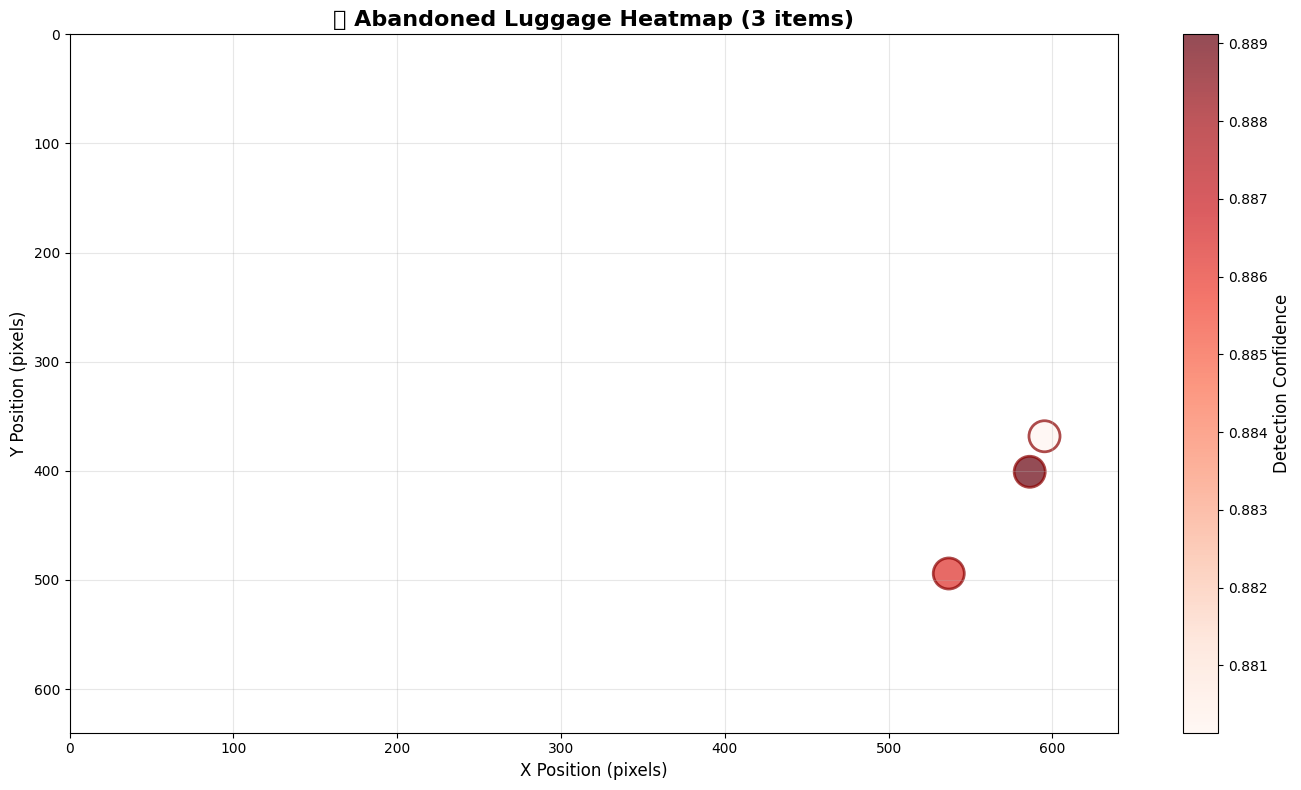

In [24]:
# ============== VISUALIZATION 2: ABANDONED LUGGAGE HEATMAP ==============
fig, ax = plt.subplots(figsize=(14, 8))

# Extract positions of abandoned luggage
abandoned_x = [item['x_center'] for item in abandoned_luggage]
abandoned_y = [item['y_center'] for item in abandoned_luggage]
confidences = [item['confidence'] for item in abandoned_luggage]

# Heatmap of abandoned luggage locations
scatter = ax.scatter(abandoned_x, abandoned_y, s=500, c=confidences, cmap='Reds',
                     alpha=0.7, edgecolors='darkred', linewidth=2)
ax.set_xlim(0, 640)
ax.set_ylim(0, 640)
ax.invert_yaxis()
ax.set_title(f'🚨 Abandoned Luggage Heatmap ({len(abandoned_luggage)} items)',
             fontsize=16, fontweight='bold')
ax.set_xlabel('X Position (pixels)', fontsize=12)
ax.set_ylabel('Y Position (pixels)', fontsize=12)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Detection Confidence', fontsize=12)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('/content/drive/My Drive/kodikonJAI/results/02_abandoned_luggage_heatmap.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 02_abandoned_luggage_heatmap.png")
plt.show()


/tmp/ipython-input-2455920507.py:55: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


✅ Saved: 03_scene_complexity_analysis.png


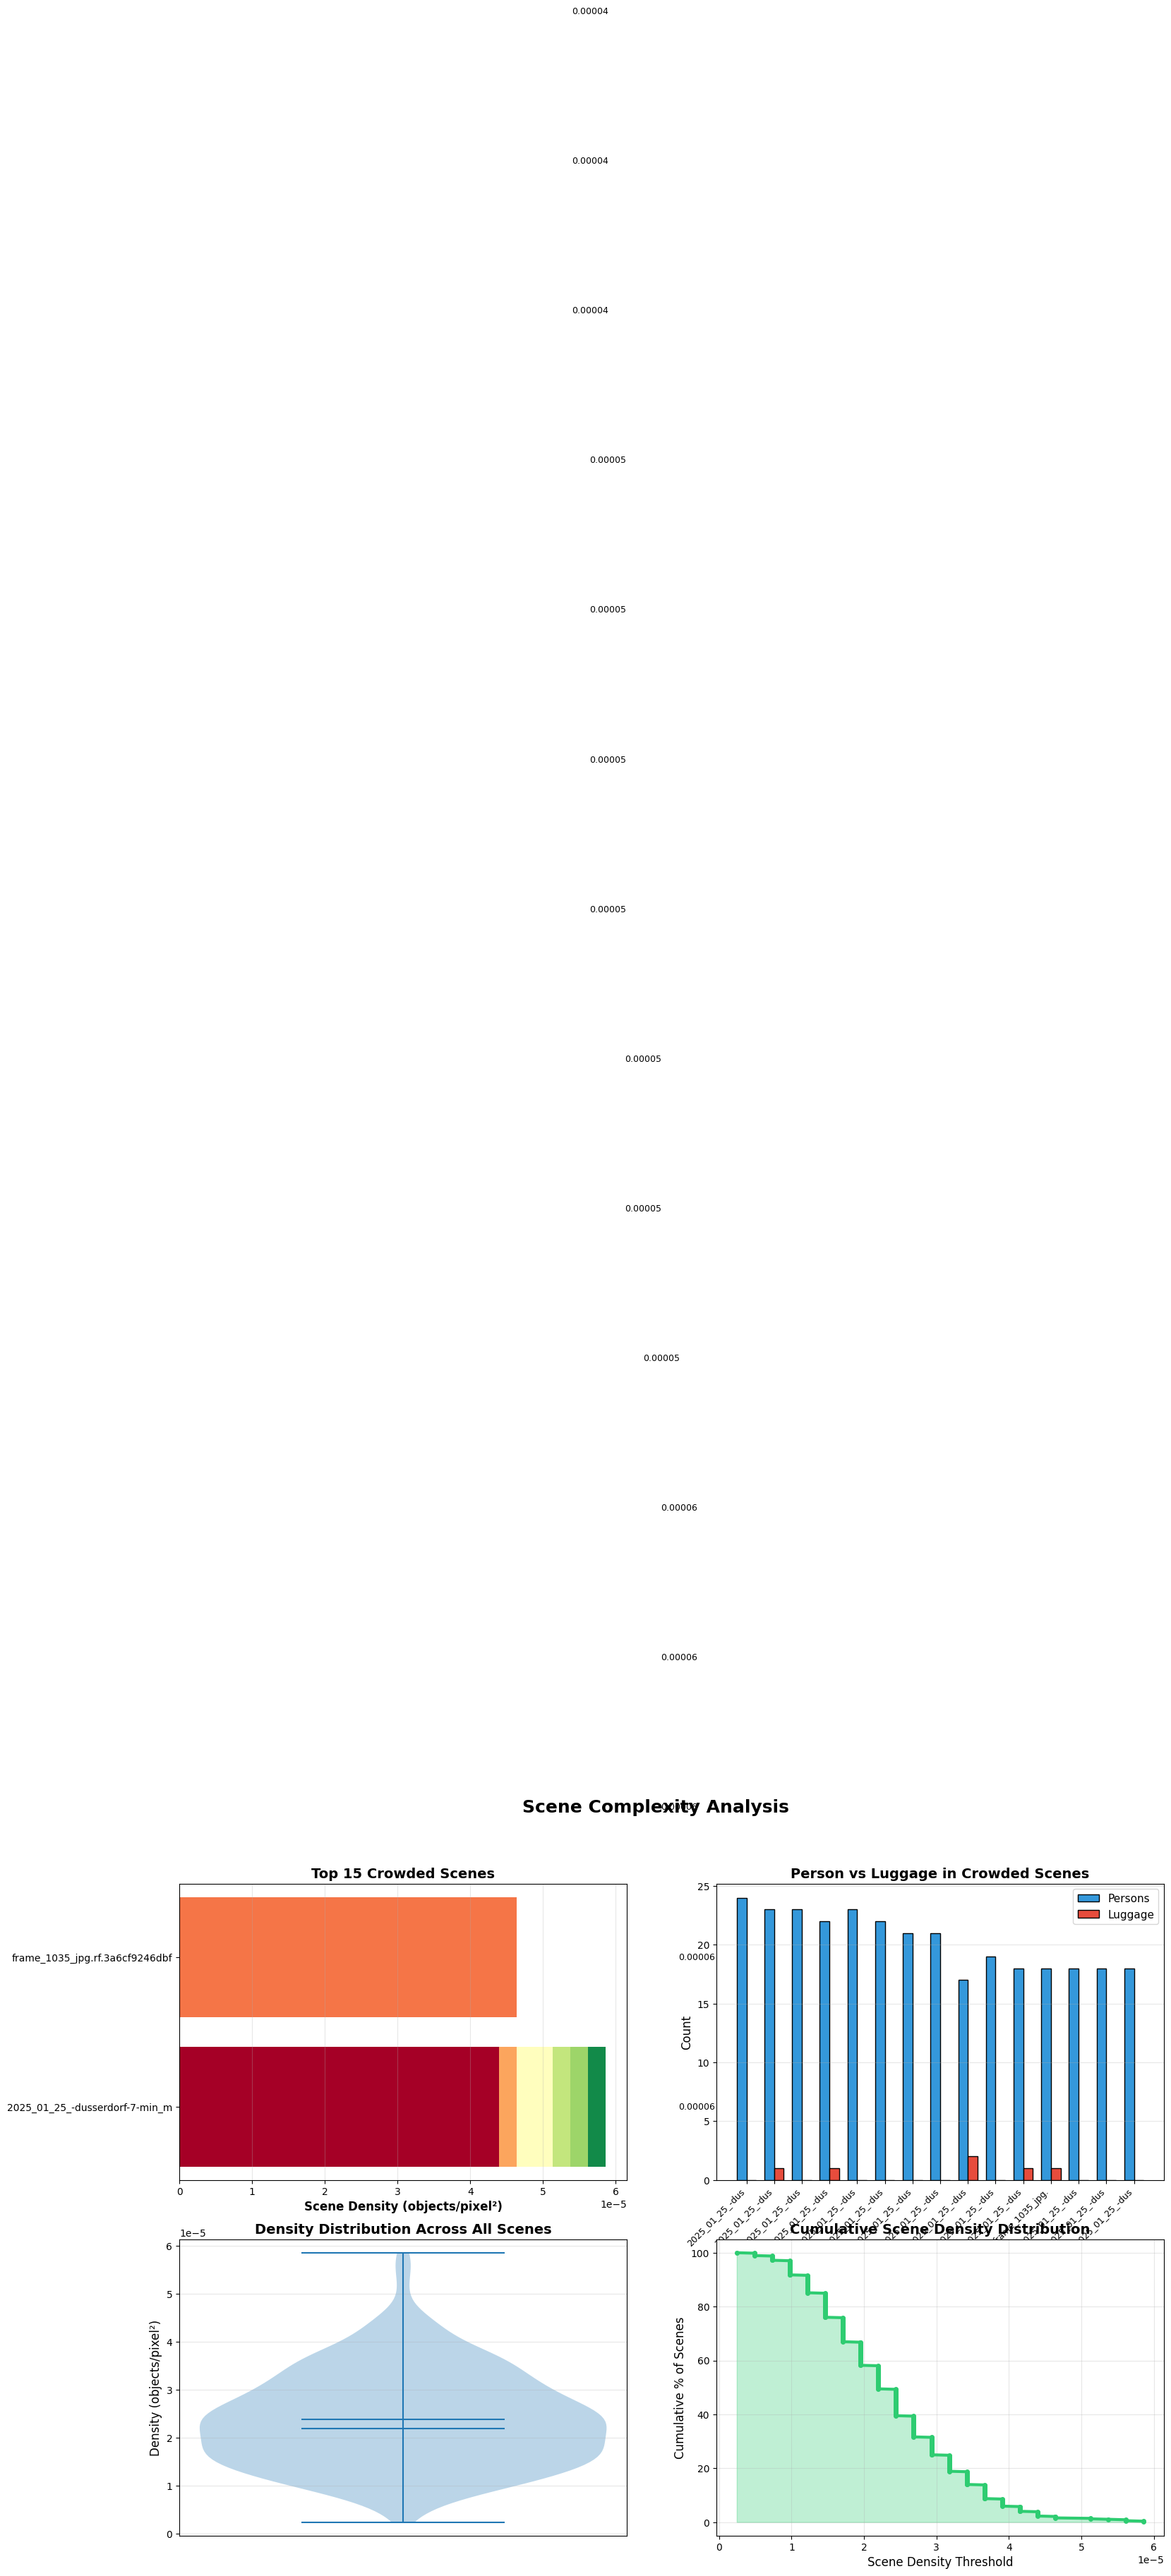

In [25]:
# ============== VISUALIZATION 3: TOP CROWDED SCENES ==============
top_k = 15
top_scenes = sorted_scenes[:top_k]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Scene Complexity Analysis', fontsize=18, fontweight='bold')

# 1. Top Crowded Scenes
ax = axes[0, 0]
scene_names = [s[0][:30] for s in top_scenes]  # Truncate names
densities = [s[1]['density'] for s in top_scenes]
bars = ax.barh(scene_names, densities, color=plt.cm.RdYlGn_r(np.linspace(0, 1, len(scene_names))))
ax.set_xlabel('Scene Density (objects/pixel²)', fontsize=12, fontweight='bold')
ax.set_title(f'Top {top_k} Crowded Scenes', fontsize=14, fontweight='bold')
for i, (bar, density) in enumerate(zip(bars, densities)):
    ax.text(density + 0.00001, i, f'{density:.5f}', va='center', fontsize=9)
ax.grid(axis='x', alpha=0.3)

# 2. Person vs Luggage per Scene
ax = axes[0, 1]
person_counts = [s[1]['person_count'] for s in top_scenes]
luggage_counts = [s[1]['luggage_count'] for s in top_scenes]
x = np.arange(len(scene_names))
width = 0.35
ax.bar(x - width/2, person_counts, width, label='Persons', color='#3498db', edgecolor='black')
ax.bar(x + width/2, luggage_counts, width, label='Luggage', color='#e74c3c', edgecolor='black')
ax.set_xticks(x)
ax.set_xticklabels([s[0][:15] for s in top_scenes], rotation=45, ha='right', fontsize=9)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Person vs Luggage in Crowded Scenes', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

# 3. Density Distribution (Violin Plot)
ax = axes[1, 0]
all_densities = [s[1]['density'] for s in sorted_scenes]
parts = ax.violinplot(all_densities, positions=[0], widths=0.7,
                      showmeans=True, showmedians=True)
ax.set_ylabel('Density (objects/pixel²)', fontsize=12)
ax.set_title('Density Distribution Across All Scenes', fontsize=14, fontweight='bold')
ax.set_xticks([])
ax.grid(axis='y', alpha=0.3)

# 4. Cumulative Distribution
ax = axes[1, 1]
sorted_densities = sorted(all_densities, reverse=True)
cumulative = np.arange(1, len(sorted_densities) + 1) / len(sorted_densities) * 100
ax.plot(sorted_densities, cumulative, linewidth=3, color='#2ecc71', marker='o', markersize=4)
ax.set_xlabel('Scene Density Threshold', fontsize=12)
ax.set_ylabel('Cumulative % of Scenes', fontsize=12)
ax.set_title('Cumulative Scene Density Distribution', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.fill_between(sorted_densities, cumulative, alpha=0.3, color='#2ecc71')

plt.tight_layout()
plt.savefig('/content/drive/My Drive/kodikonJAI/results/03_scene_complexity_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 03_scene_complexity_analysis.png")
plt.show()


/tmp/ipython-input-1943672948.py:46: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1943672948.py:46: UserWarning: Glyph 127890 (\N{SCHOOL SATCHEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1943672948.py:46: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1943672948.py:47: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/drive/My Drive/kodikonJAI/results/04_knowledge_graph_network.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-1943672948.py:47: UserWarning: Glyph 127890 (\N{SCHOOL SATCHEL}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/drive/My Drive/kodikonJAI/results/04_knowledge_graph_network.png', dpi=300, bbox_inches='tight')
/tmp/ipython-input-1943672948.py:47: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) mis

✅ Saved: 04_knowledge_graph_network.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127890 (\N{SCHOOL SATCHEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


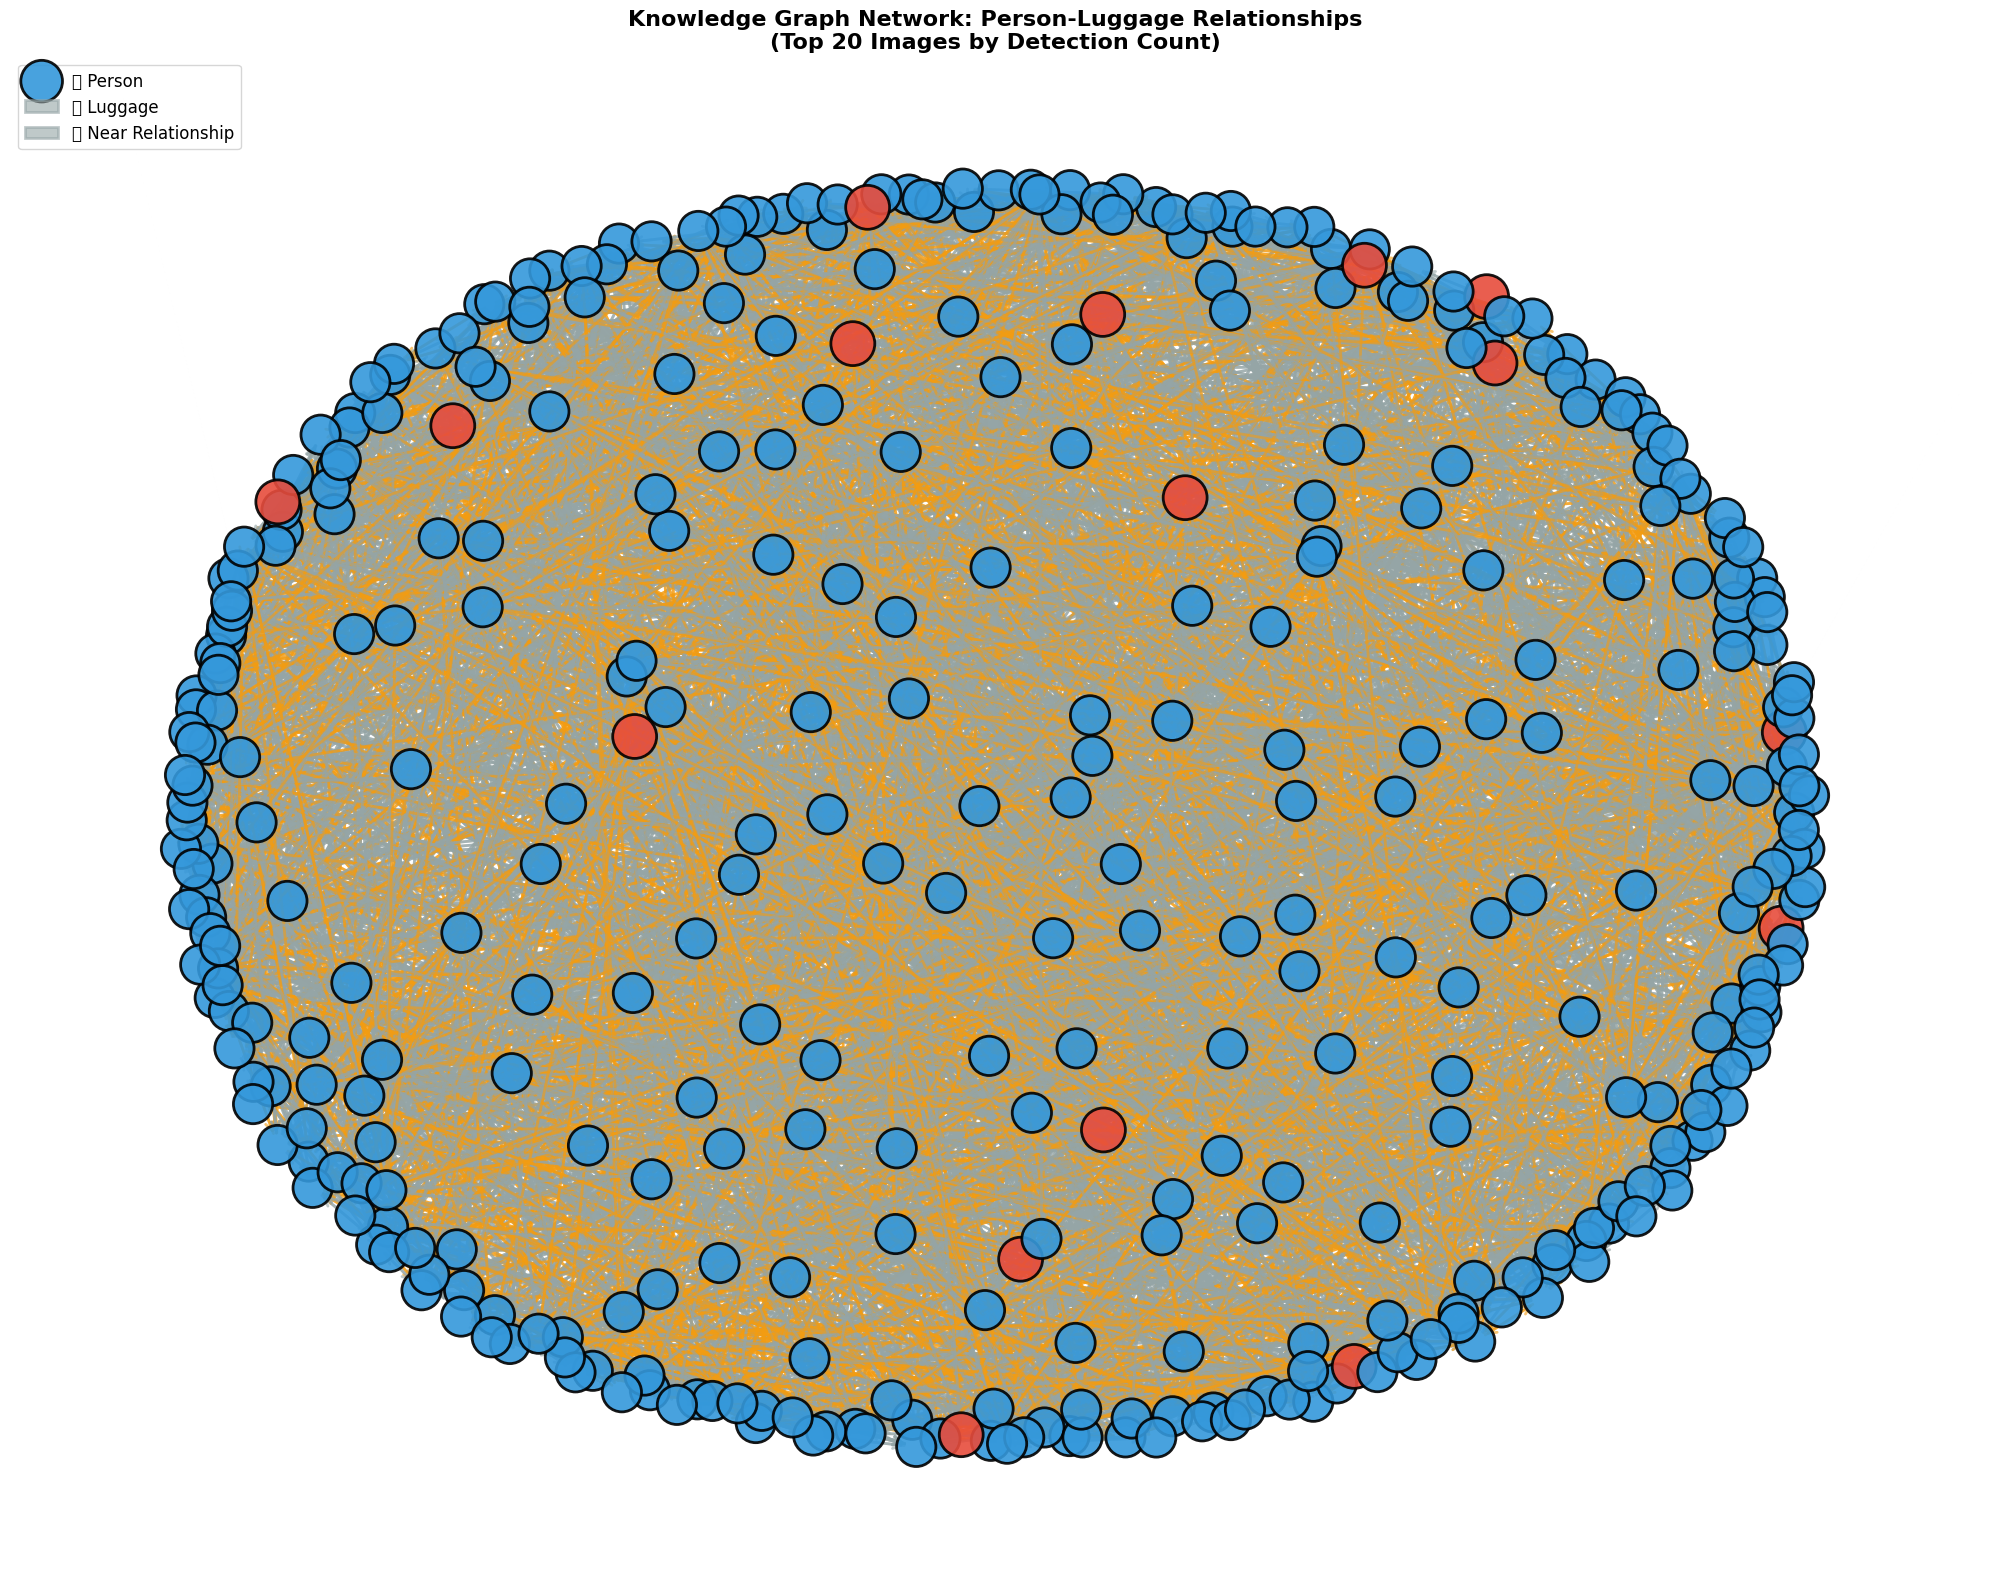

In [26]:
# ============== VISUALIZATION 4: KNOWLEDGE GRAPH NETWORK ==============
# Sample top 20 images by object count for cleaner visualization
top_images = df['image_name'].value_counts().head(20).index
sampled_nodes = [n for n in G.nodes() if G.nodes[n]['image_name'] in top_images]
subgraph = G.subgraph(sampled_nodes).copy()

fig, ax = plt.subplots(figsize=(20, 16))

# Layout
pos = nx.spring_layout(subgraph, k=3, iterations=100, seed=42)

# Node colors
node_colors = []
node_sizes = []
for node in subgraph.nodes():
    if subgraph.nodes[node]['class_label'] == 'person':
        node_colors.append('#3498db')
        node_sizes.append(800)
    elif subgraph.nodes[node]['class_label'] == 'luggage':
        node_colors.append('#e74c3c')
        node_sizes.append(1000)
    else:
        node_colors.append('#95a5a6')
        node_sizes.append(500)

# Draw
nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=node_sizes,
                       ax=ax, alpha=0.9, edgecolors='black', linewidths=2)

# Edge colors based on relationship
edge_colors = []
for u, v, data in subgraph.edges(data=True):
    if data.get('relationship') == 'near':
        edge_colors.append('#f39c12')  # Orange for near
    else:
        edge_colors.append('#95a5a6')  # Gray for far

nx.draw_networkx_edges(subgraph, pos, edge_color=edge_colors, alpha=0.6, ax=ax,
                       arrows=True, arrowsize=15, arrowstyle='->', width=2)

ax.set_title('Knowledge Graph Network: Person-Luggage Relationships\n(Top 20 Images by Detection Count)',
             fontsize=16, fontweight='bold')
ax.legend(['👤 Person', '🎒 Luggage', '🟡 Near Relationship'], loc='upper left', fontsize=12)
ax.axis('off')

plt.tight_layout()
plt.savefig('/content/drive/My Drive/kodikonJAI/results/04_knowledge_graph_network.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 04_knowledge_graph_network.png")
plt.show()


In [27]:
# ============== SAVE COMPREHENSIVE REPORT ==============
report = {
    'dataset_summary': {
        'total_images': int(df['image_name'].nunique()),
        'total_detections': int(len(df)),
        'persons': int(len(df[df['class_label'] == 'person'])),
        'luggage': int(len(df[df['class_label'] == 'luggage'])),
        'other': int(len(df[df['class_label'] == 'other']))
    },
    'graph_metrics': {
        'nodes': int(G.number_of_nodes()),
        'edges': int(G.number_of_edges()),
        'avg_degree': float(np.mean([d for n, d in G.degree()]))
    },
    'alerts': {
        'abandoned_luggage': len(abandoned_luggage),
        'suspicious_patterns': len(suspicious_patterns),
        'crowded_scenes': len([s for s in sorted_scenes if s[1]['total_objects'] > 5])
    },
    'relationships': {
        'person_luggage_pairs': len(person_luggage_pairs),
        'avg_scene_density': float(np.mean([s[1]['density'] for s in sorted_scenes]))
    }
}

with open('/content/drive/My Drive/kodikonJAI/results/comprehensive_report.json', 'w') as f:
    json.dump(report, f, indent=2)

print("\n" + "="*60)
print("📊 COMPREHENSIVE ANALYSIS COMPLETE")
print("="*60)
for section, data in report.items():
    print(f"\n{section.upper()}:")
    for key, value in data.items():
        print(f"  {key}: {value}")
print("="*60)
print("\n✅ All visualizations saved to /kodikonJAI/results/")



📊 COMPREHENSIVE ANALYSIS COMPLETE

DATASET_SUMMARY:
  total_images: 572
  total_detections: 5581
  persons: 4634
  luggage: 947
  other: 0

GRAPH_METRICS:
  nodes: 5581
  edges: 58484
  avg_degree: 20.95825120946067

ALERTS:
  abandoned_luggage: 3
  suspicious_patterns: 722
  crowded_scenes: 486

RELATIONSHIPS:
  person_luggage_pairs: 6448
  avg_scene_density: 2.3820783708479022e-05

✅ All visualizations saved to /kodikonJAI/results/


In [ ]:
// web dashboard

SyntaxError: invalid syntax (ipython-input-3037807933.py, line 1)

In [28]:
!pip install streamlit streamlit-option-menu plotly pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.3/829.3 kB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.8 MB/s eta 0:00:00


In [29]:
import streamlit as st
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

@st.cache_resource
def load_data():
    df = pd.read_csv('/content/drive/My Drive/kodikonJAI/results/detections.csv')
    # Add a unique ID column if not already present, for consistent counting later
    df['detection_id'] = range(len(df))
    with open('/content/drive/My Drive/kodikonJAI/results/knowledge_graph.json', 'r') as f:
        graph_data = json.load(f)
    with open('/content/drive/My Drive/kodikonJAI/results/comprehensive_report.json', 'r') as f:
        report = json.load(f)
    return df, graph_data, report

def calculate_spatial_proximity(df, image_name, max_distance=100):
    """Calculate person-luggage pairs based on spatial proximity"""
    image_df = df[df['image_name'] == image_name].copy()
    persons = image_df[image_df['class_label'] == 'person']
    luggage = image_df[image_df['class_label'] == 'luggage']

    pairs = []
    isolated_luggage = []

    for _, lug in luggage.iterrows():
        lug_x = (lug['x1'] + lug['x2']) / 2
        lug_y = (lug['y1'] + lug['y2']) / 2

        min_distance = float('inf')
        nearest_person = None

        for _, person in persons.iterrows():
            person_x = (person['x1'] + person['x2']) / 2
            person_y = (person['y1'] + person['y2']) / 2

            distance = ((lug_x - person_x)**2 + (lug_y - person_y)**2)**0.5

            if distance < min_distance:
                min_distance = distance
                # Use a unique identifier for the person if available, or just its index
                nearest_person = person['detection_id'] # Use the new 'detection_id' for uniqueness

        if min_distance <= max_distance and nearest_person:
            pairs.append({
                'luggage_id': lug['detection_id'], # Use the new 'detection_id'
                'person_id': nearest_person,
                'distance': min_distance
            })
        else:
            isolated_luggage.append({
                'luggage_id': lug['detection_id'], # Use the new 'detection_id'
                'distance_to_nearest': min_distance
            })

    return pairs, isolated_luggage

df, graph_data, report = load_data()

# Page configuration
st.set_page_config(page_title="🎒 VEKG Dashboard", layout="wide", initial_sidebar_state="expanded")

# Custom CSS for better styling
st.markdown("""
    <style>
    .metric-card {
        background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
        padding: 20px;
        border-radius: 10px;
        color: white;
        text-align: center;
    }
    .alert-box {
        padding: 15px;
        border-radius: 8px;
        margin: 10px 0;
    }
    .stButton>button {
        width: 100%;
    }
    </style>
""", unsafe_allow_html=True)

st.title("🎒 VEKG: Video Event Knowledge Graph Dashboard")
st.markdown("*Real-time surveillance analytics and intelligent monitoring*")

# Sidebar
with st.sidebar:
    st.image("https://img.icons8.com/color/96/000000/cctv-camera.png", width=80)
    st.markdown("### Navigation")
    page = st.radio(
        "Select View:",
        ["📊 Dashboard", "🚨 Alerts", "👥 Relationships", "📈 Analysis", "🔍 Query Engine"],
        label_visibility="collapsed"
    )

    st.markdown("---")
    st.markdown("### Quick Stats")
    st.metric("Total Images", report['dataset_summary']['total_images'], delta=None)
    st.metric("Active Alerts", report['alerts']['abandoned_luggage'], delta="Critical")

# ===== DASHBOARD PAGE =====
if page == "📊 Dashboard":
    st.header("📊 Overview Dashboard")

    # Metrics row
    col1, col2, col3, col4, col5 = st.columns(5)
    with col1:
        st.metric("📸 Images", report['dataset_summary']['total_images'])
    with col2:
        st.metric("🎯 Detections", report['dataset_summary']['total_detections'])
    with col3:
        st.metric("👤 Persons", report['dataset_summary']['persons'])
    with col4:
        st.metric("🧳 Luggage", report['dataset_summary']['luggage'])
    with col5:
        st.metric("⚠️ Alerts", report['alerts']['abandoned_luggage'], delta="Critical", delta_color="inverse")

    st.markdown("---")

    # Charts
    col1, col2 = st.columns(2)
    with col1:
        detection_counts = df['class_label'].value_counts()
        fig = px.bar(
            x=detection_counts.index,
            y=detection_counts.values,
            title='📊 Detection Distribution',
            labels={'x': 'Object Class', 'y': 'Count'},
            color=detection_counts.values,
            color_continuous_scale='Viridis'
        )
        fig.update_layout(showlegend=False, height=400)
        st.plotly_chart(fig, use_container_width=True)

    with col2:
        fig = px.histogram(
            df,
            x='confidence',
            nbins=30,
            title='🎯 Confidence Score Distribution',
            labels={'confidence': 'Confidence Score', 'count': 'Frequency'},
            color_discrete_sequence=['#667eea']
        )
        fig.update_layout(height=400)
        st.plotly_chart(fig, use_container_width=True)

    # Image-wise breakdown
    st.subheader("📷 Per-Image Breakdown")
    image_stats = df.groupby('image_name').agg({
        'detection_id': 'count', # Use the new 'detection_id' column to count
        'confidence': 'mean'
    }).rename(columns={'detection_id': 'detections', 'confidence': 'avg_confidence'})

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=image_stats.index,
        y=image_stats['detections'],
        name='Detections',
        marker_color='lightblue'
    ))
    fig.update_layout(
        title='Detections per Image',
        xaxis_title='Image',
        yaxis_title='Count',
        height=350
    )
    st.plotly_chart(fig, use_container_width=True)

# ===== ALERTS PAGE =====
elif page == "🚨 Alerts":
    st.header("🚨 Security Alerts")

    col1, col2, col3 = st.columns(3)
    with col1:
        st.error("### 🧳 Abandoned Luggage")
        st.metric("Count", report['alerts']['abandoned_luggage'])
        if report['alerts']['abandoned_luggage'] > 0:
            st.warning("⚠️ Immediate attention required")

    with col2:
        st.warning("### 🔍 Suspicious Patterns")
        st.metric("Count", report['alerts']['suspicious_patterns'])
        if report['alerts']['suspicious_patterns'] > 0:
            st.info("ℹ️ Review recommended")

    with col3:
        st.info("### 👥 Crowded Scenes")
        st.metric("Count", report['alerts']['crowded_scenes'])
        if report['alerts']['crowded_scenes'] > 0:
            st.success("✓ Monitoring active")

    st.markdown("---")

    # Detailed alert breakdown
    st.subheader("🔍 Alert Details by Image")

    alert_data = []
    for image_name in df['image_name'].unique():
        image_df = df[df['image_name'] == image_name]
        persons = len(image_df[image_df['class_label'] == 'person'])
        luggage = len(image_df[image_df['class_label'] == 'luggage'])

        alert_type = []
        if luggage > persons and luggage > 0:
            alert_type.append("🧳 Possible Abandoned Luggage")
        if persons > 10:
            alert_type.append("👥 Crowded Scene")
        if persons > 0 and luggage > 0:
            ratio = persons / luggage
            if ratio < 0.5:
                alert_type.append("🔍 Suspicious Pattern")

        if alert_type:
            alert_data.append({
                'Image': image_name,
                'Persons': persons,
                'Luggage': luggage,
                'Alert Type': ', '.join(alert_type),
                'Priority': '🔴 High' if '🧳' in str(alert_type) else '🟡 Medium'
            })

    if alert_data:
        alert_df = pd.DataFrame(alert_data)
        st.dataframe(alert_df, use_container_width=True, height=400)

        csv = alert_df.to_csv(index=False)
        st.download_button(
            "📥 Download Alert Report",
            csv,
            "alert_report.csv",
            "text/csv",
            key='download-alerts'
        )
    else:
        st.success("✅ No active alerts at this time")

# ===== RELATIONSHIPS PAGE =====
elif page == "👥 Relationships":
    st.header("👥 Person-Luggage Relationship Analysis")

    # Configuration
    col1, col2 = st.columns([2, 1])
    with col1:
        selected_image = st.selectbox(
            "Select Image for Analysis:",
            df['image_name'].unique(),
            help="Choose an image to analyze person-luggage relationships"
        )
    with col2:
        proximity_threshold = st.slider(
            "Proximity Threshold (pixels):",
            min_value=50,
            max_value=300,
            value=100,
            step=10,
            help="Maximum distance to consider person-luggage as paired"
        )

    # Calculate relationships
    pairs, isolated = calculate_spatial_proximity(df, selected_image, proximity_threshold)

    # Display results
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("👥 Person-Luggage Pairs", len(pairs))
    with col2:
        st.metric("🧳 Isolated Luggage", len(isolated))
    with col3:
        image_df = df[df['image_name'] == selected_image]
        total_persons = len(image_df[image_df['class_label'] == 'person'])
        total_luggage = len(image_df[image_df['class_label'] == 'luggage'])
        st.metric("📊 P/L Ratio", f"{total_persons}/{total_luggage}")

    st.markdown("---")

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("✅ Paired Items")
        if pairs:
            pairs_df = pd.DataFrame(pairs)
            pairs_df['distance'] = pairs_df['distance'].round(2)
            st.dataframe(pairs_df, use_container_width=True)
        else:
            st.info("No paired items found with current threshold")

    with col2:
        st.subheader("⚠️ Isolated Luggage")
        if isolated:
            isolated_df = pd.DataFrame(isolated)
            isolated_df['distance_to_nearest'] = isolated_df['distance_to_nearest'].round(2)
            st.dataframe(isolated_df, use_container_width=True)

            if len(isolated) > 0:
                st.warning(f"⚠️ {len(isolated)} isolated luggage item(s) detected!")
        else:
            st.success("✅ All luggage items are paired")

    # Visualization
    st.subheader("📍 Spatial Distribution")
    image_df = df[df['image_name'] == selected_image]

    fig = go.Figure()

    # Plot persons
    persons = image_df[image_df['class_label'] == 'person']
    fig.add_trace(go.Scatter(
        x=[(row['x1'] + row['x2']) / 2 for _, row in persons.iterrows()],
        y=[(row['y1'] + row['y2']) / 2 for _, row in persons.iterrows()],
        mode='markers',
        name='Persons',
        marker=dict(size=12, color='blue', symbol='circle')
    ))

    # Plot luggage
    luggage = image_df[image_df['class_label'] == 'luggage']
    fig.add_trace(go.Scatter(
        x=[(row['x1'] + row['x2']) / 2 for _, row in luggage.iterrows()],
        y=[(row['y1'] + row['y2']) / 2 for _, row in luggage.iterrows()],
        mode='markers',
        name='Luggage',
        marker=dict(size=12, color='red', symbol='square')
    ))

    fig.update_layout(
        title='Object Positions in Frame',
        xaxis_title='X Position',
        yaxis_title='Y Position',
        height=400,
        hovermode='closest'
    )
    st.plotly_chart(fig, use_container_width=True)

# ===== ANALYSIS PAGE =====
elif page == "📈 Analysis":
    st.header("📈 Statistical Analysis")

    col1, col2 = st.columns(2)

    with col1:
        st.subheader("🎯 Scene Complexity Metrics")
        st.metric("Average Scene Density", f"{report['relationships']['avg_scene_density']:.5f}")
        st.metric("Total Person-Luggage Pairs", report['relationships']['person_luggage_pairs'])

        # Calculate additional metrics
        avg_detections = df.groupby('image_name').size().mean()
        st.metric("Avg Detections per Image", f"{avg_detections:.2f}")

    with col2:
        st.subheader("📊 Detection Quality")
        avg_confidence = df['confidence'].mean()
        st.metric("Average Confidence", f"{avg_confidence:.2%}")

        high_conf = len(df[df['confidence'] >= 0.8])
        st.metric("High Confidence Detections (≥80%)", high_conf)

    st.markdown("---")

    # Time series style analysis
    st.subheader("📷 Progressive Analysis Across Images")

    image_analysis = []
    for img in df['image_name'].unique():
        img_df = df[df['image_name'] == img]
        image_analysis.append({
            'Image': img,
            'Total Objects': len(img_df),
            'Persons': len(img_df[img_df['class_label'] == 'person']),
            'Luggage': len(img_df[img_df['class_label'] == 'luggage']),
            'Avg Confidence': img_df['confidence'].mean()
        })

    analysis_df = pd.DataFrame(image_analysis)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=analysis_df['Image'], y=analysis_df['Persons'],
                             mode='lines+markers', name='Persons', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=analysis_df['Image'], y=analysis_df['Luggage'],
                             mode='lines+markers', name='Luggage', line=dict(color='red')))

    fig.update_layout(
        title='Object Count Trends Across Images',
        xaxis_title='Image',
        yaxis_title='Count',
        height=400
    )
    st.plotly_chart(fig, use_container_width=True)

    # Correlation analysis
    st.subheader("🔗 Correlation Analysis")
    col1, col2 = st.columns(2)

    with col1:
        correlation = analysis_df['Persons'].corr(analysis_df['Luggage'])
        st.metric("Person-Luggage Correlation", f"{correlation:.3f}")

        if correlation > 0.7:
            st.success("Strong positive correlation detected")
        elif correlation > 0.3:
            st.info("Moderate correlation detected")
        else:
            st.warning("Weak correlation - investigate further")

    with col2:
        st.metric("Detection Variance", f"{analysis_df['Total Objects'].std():.2f}")
        st.metric("Confidence Std Dev", f"{analysis_df['Avg Confidence'].std():.3f}")

# ===== QUERY ENGINE PAGE =====
elif page == "🔍 Query Engine":
    st.header("🔍 Advanced Query Engine")
    st.markdown("*Run intelligent queries on your surveillance data*")

    query_type = st.selectbox(
        "🎯 Select Query Type:",
        [
            "Find images with high person-luggage ratio",
            "Find isolated luggage by image",
            "Find crowded scenes",
            "Confidence threshold analysis",
            "Spatial proximity analysis",
            "Custom multi-filter query"
        ],
        help="Select the type of analysis you want to perform"
    )

    st.markdown("---")

    # Query 1: Person-Luggage Ratio
    if query_type == "Find images with high person-luggage ratio":
        col1, col2 = st.columns([3, 1])
        with col1:
            ratio_threshold = st.slider(
                "Minimum Person/Luggage Ratio:",
                min_value=0.0,
                max_value=5.0,
                value=1.5,
                step=0.1,
                help="Higher ratio indicates more people relative to luggage"
            )
        with col2:
            min_luggage = st.number_input("Min Luggage Items:", min_value=1, value=1)

        results = []
        for image_name in df['image_name'].unique():
            image_df = df[df['image_name'] == image_name]
            persons = len(image_df[image_df['class_label'] == 'person'])
            luggage = len(image_df[image_df['class_label'] == 'luggage'])

            if luggage >= min_luggage:
                ratio = persons / luggage
                if ratio >= ratio_threshold:
                    results.append({
                        'Image': image_name,
                        'Persons': persons,
                        'Luggage': luggage,
                        'Ratio': f"{ratio:.2f}",
                        'Status': '✅ Normal' if ratio > 1 else '⚠️ Monitor'
                    })

        if results:
            st.success(f"✅ Found {len(results)} matching images")
            results_df = pd.DataFrame(results)
            st.dataframe(results_df, use_container_width=True, height=350)

            csv = results_df.to_csv(index=False)
            st.download_button("📥 Download Results", csv, "person_luggage_ratio.csv", "text/csv")
        else:
            st.warning("⚠️ No images match your criteria. Try adjusting the parameters.")

    # Query 2: Isolated Luggage
    elif query_type == "Find isolated luggage by image":
        col1, col2 = st.columns(2)
        with col1:
            selected_images = st.multiselect(
                "Select Images to Analyze:",
                df['image_name'].unique(),
                default=list(df['image_name'].unique())[:3]
            )
        with col2:
            proximity = st.slider("Proximity Threshold (px):", 50, 300, 100, 10)

        if selected_images:
            results = []
            for img in selected_images:
                pairs, isolated = calculate_spatial_proximity(df, img, proximity)
                if isolated:
                    results.append({
                        'Image': img,
                        'Isolated Items': len(isolated),
                        'Total Luggage': len(df[(df['image_name'] == img) & (df['class_label'] == 'luggage')]),
                        'Risk Level': '🔴 High' if len(isolated) > 2 else '🟡 Medium' if len(isolated) > 0 else '🟢 Low'
                    })

            if results:
                st.warning(f"⚠️ Found isolated luggage in {len(results)} images")
                st.dataframe(pd.DataFrame(results), use_container_width=True)

            else:
                st.success("✅ No isolated luggage detected")

    # Query 3: Crowded Scenes
    elif query_type == "Find crowded scenes":
        threshold = st.slider("Minimum Person Count for 'Crowded':", 5, 50, 15)

        crowded = []
        for img in df['image_name'].unique():
            count = len(df[(df['image_name'] == img) & (df['class_label'] == 'person')])
            if count >= threshold:
                crowded.append({
                    'Image': img,
                    'Person Count': count,
                    'Crowd Level': '🔴 Very Crowded' if count > threshold * 1.5 else '🟡 Crowded'
                })

        if crowded:
            st.warning(f"Found {len(crowded)} crowded scenes")
            st.dataframe(pd.DataFrame(crowded), use_container_width=True)

            # Visualization
            crowd_df = pd.DataFrame(crowded)
            fig = px.bar(crowd_df, x='Image', y='Person Count',
                        color='Crowd Level', title='Crowd Levels Across Images')
            st.plotly_chart(fig, use_container_width=True)
        else:
            st.info("No crowded scenes found with current threshold")

    # Query 4: Confidence Analysis
    elif query_type == "Confidence threshold analysis":
        col1, col2 = st.columns(2)
        with col1:
            conf_min = st.slider("Minimum Confidence:", 0.0, 1.0, 0.8, 0.05)
        with col2:
            class_filter = st.multiselect(
                "Filter by Class:",
                df['class_label'].unique(),
                default=list(df['class_label'].unique())
            )

        filtered = df[(df['confidence'] >= conf_min) & (df['class_label'].isin(class_filter))]

        st.metric("Matching Detections", len(filtered))

        if not filtered.empty:
            col1, col2 = st.columns(2)
            with col1:
                st.dataframe(
                    filtered[['image_name', 'class_label', 'confidence']].sort_values('confidence', ascending=False).head(20),
                    use_container_width=True
                )
            with col2:
                fig = px.histogram(filtered, x='confidence', nbins=20,
                                  title='Filtered Confidence Distribution')
                st.plotly_chart(fig, use_container_width=True)

            csv = filtered.to_csv(index=False)
            st.download_button("📥 Download Filtered Data", csv, "high_confidence_detections.csv")

    # Query 5: Spatial Proximity
    elif query_type == "Spatial proximity analysis":
        st.subheader("🗺️ Comprehensive Spatial Analysis")

        proximity_range = st.slider("Analyze Proximity Within (pixels):", 50, 300, 150, 10)

        all_results = []
        for img in df['image_name'].unique():
            pairs, isolated = calculate_spatial_proximity(df, img, proximity_range)
            all_results.append({
                'Image': img,
                'Paired Items': len(pairs),
                'Isolated Items': len(isolated),
                'Pairing Rate': f"{len(pairs) / (len(pairs) + len(isolated)) * 100:.1f}%" if (len(pairs) + len(isolated)) > 0 else "N/A"
            })

        results_df = pd.DataFrame(all_results)
        st.dataframe(results_df, use_container_width=True)

        fig = go.Figure()
        fig.add_trace(go.Bar(x=results_df['Image'], y=results_df['Paired Items'], name='Paired'))
        fig.add_trace(go.Bar(x=results_df['Image'], y=results_df['Isolated Items'], name='Isolated'))
        fig.update_layout(barmode='group', title='Pairing Analysis Across All Images')
        st.plotly_chart(fig, use_container_width=True)

    # Query 6: Custom Multi-Filter
    elif query_type == "Custom multi-filter query":
        st.subheader("🎛️ Build Your Custom Query")

        col1, col2, col3 = st.columns(3)
        with col1:
            min_persons = st.number_input("Min Persons:", 0, 100, 0)
            max_persons = st.number_input("Max Persons:", 0, 100, 100)
        with col2:
            min_luggage = st.number_input("Min Luggage:", 0, 50, 0)
            max_luggage = st.number_input("Max Luggage:", 0, 50, 50)
        with col3:
            min_conf = st.slider("Min Avg Confidence:", 0.0, 1.0, 0.5, 0.05)

        custom_results = []
        for img in df['image_name'].unique():
            img_df = df[df['image_name'] == img]
            persons = len(img_df[img_df['class_label'] == 'person'])
            luggage = len(img_df[img_df['class_label'] == 'luggage'])
            avg_conf = img_df['confidence'].mean()

            if (min_persons <= persons <= max_persons and
                min_luggage <= luggage <= max_luggage and
                avg_conf >= min_conf):
                custom_results.append({
                    'Image': img,
                    'Persons': persons,
                    'Luggage': luggage,
                    'Avg Confidence': f"{avg_conf:.2%}",
                    'Total Detections': len(img_df)
                })

        if custom_results:
            st.success(f"✅ Found {len(custom_results)} images matching all criteria")
            custom_df = pd.DataFrame(custom_results)
            st.dataframe(custom_df, use_container_width=True)

            csv = custom_df.to_csv(index=False)
            st.download_button("📥 Download Custom Query Results", csv, "custom_query_results.csv")
        else:
            st.warning("⚠️ No images match all your criteria")

# Footer
st.markdown("---")
st.markdown("""
    <div style='text-align: center; padding: 20px;'>
        <p style='color: gray; font-size: 14px;'>
            🎒 <b>VEKG Dashboard</b> | Smart Surveillance Analytics |
            Powered by AI 🤖 | Last Updated: {}
        </p>
    </div>
""".format(datetime.now().strftime("%Y-%m-%d %H:%M")), unsafe_allow_html=True)

2025-11-15 06:38:19.044 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 06:38:19.169 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-15 06:38:19.170 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 06:38:19.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 06:38:19.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 06:38:19.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 06:38:19.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 06:38:19.378 Thread 'MainThread': mi

DeltaGenerator()

In [41]:
st.markdown("""
    <style>
    .main {
        padding-top: 2rem;
    }
    h1 {
        color: #1f77b4;
        text-align: center;
    }
    h2 {
        color: #ff7f0e;
    }
    </style>
""", unsafe_allow_html=True)


2025-11-15 06:57:34.461 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 06:57:34.462 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-15 06:57:34.463 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [38]:
!pip install streamlit pyngrok -q


In [33]:
!ngrok authtoken 35RSSXr0JgaHMKZtwBWXw2MoAfM_3io3dAHynzBTAnCBv3bGn


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [35]:
!pkill -f streamlit


In [44]:
# Step 1: Install necessary dependencies
!pip install streamlit pyngrok plotly pandas -q

# Step 2: Write the user-friendly Streamlit app (all queries working)
app_code = """
import streamlit as st
import pandas as pd
import json
import plotly.express as px

@st.cache_resource
def load_data():
    df = pd.read_csv('/content/drive/My Drive/kodikonJAI/results/detections.csv')
    with open('/content/drive/My Drive/kodikonJAI/results/knowledge_graph.json', 'r') as f:
        graph_data = json.load(f)
    with open('/content/drive/My Drive/kodikonJAI/results/comprehensive_report.json', 'r') as f:
        report = json.load(f)
    return df, graph_data, report

df, graph_data, report = load_data()

st.set_page_config(page_title="🎒 VEKG Dashboard", layout="wide")
st.title("🎒 VEKG: Video Event Knowledge Graph Dashboard")

page = st.sidebar.radio("Select View:", ["📊 Dashboard", "🚨 Alerts", "👥 Relationships", "📈 Analysis", "🔍 Query Engine"])

if page == "📊 Dashboard":
    col1, col2, col3, col4, col5 = st.columns(5)
    with col1:
        st.metric("Images", report['dataset_summary']['total_images'])
    with col2:
        st.metric("Detections", report['dataset_summary']['total_detections'])
    with col3:
        st.metric("Persons", report['dataset_summary']['persons'])
    with col4:
        st.metric("Luggage", report['dataset_summary']['luggage'])
    with col5:
        st.metric("Alerts", report['alerts']['abandoned_luggage'])
    st.markdown("---")
    col1, col2 = st.columns(2)
    with col1:
        fig = px.bar(x=df['class_label'].value_counts().index, y=df['class_label'].value_counts().values, title='Detection Count')
        st.plotly_chart(fig, use_container_width=True)
    with col2:
        fig = px.histogram(df, x='confidence', nbins=30, title='Confidence Distribution')
        st.plotly_chart(fig, use_container_width=True)

elif page == "🚨 Alerts":
    st.subheader("Critical Alerts")
    col1, col2, col3 = st.columns(3)
    with col1:
        st.warning(f"**Abandoned Luggage:** {report['alerts']['abandoned_luggage']}")
    with col2:
        st.warning(f"**Suspicious Patterns:** {report['alerts']['suspicious_patterns']}")
    with col3:
        st.warning(f"**Crowded Scenes:** {report['alerts']['crowded_scenes']}")

elif page == "👥 Relationships":
    st.subheader("Person-Luggage Pairs")
    st.metric("Total Pairs", report['relationships']['person_luggage_pairs'])

elif page == "📈 Analysis":
    st.subheader("Scene Complexity")
    st.metric("Avg Scene Density", f"{report['relationships']['avg_scene_density']:.5f}")

elif page == "🔍 Query Engine":
    st.title("🔍 Advanced Query Engine")

    query_type = st.selectbox(
        "Select Query Type:",
        [
            "Find images with high person-luggage ratio",
            "Find isolated luggage by image",
            "Find crowded scenes",
            "Confidence threshold analysis",
            "Spatial proximity analysis"
        ],
        help="Select the type of surveillance query you'd like to run."
    )

    if query_type == "Find images with high person-luggage ratio":
        ratio_threshold = st.slider(
            "Person/Luggage Ratio:",
            min_value=0.0,
            max_value=5.0,
            value=1.5,
            step=0.1,
            help="Ratio of number of persons to number of luggage items in an image."
        )

        st.markdown(f"Filtering images with person/luggage ratio ≥ {ratio_threshold}")

        results = []
        for image_name in df['image_name'].unique():
            image_df = df[df['image_name'] == image_name]
            persons = len(image_df[image_df['class_label'] == 'person'])
            luggage = len(image_df[image_df['class_label'] == 'luggage'])
            if luggage > 0:
                ratio = persons / luggage
                if ratio >= ratio_threshold:
                    results.append({
                        'Image': image_name,
                        'Persons': persons,
                        'Luggage': luggage,
                        'Ratio': ratio
                    })

        if results:
            results_df = pd.DataFrame(results).sort_values('Ratio', ascending=False)
            st.dataframe(results_df, height=300)
            csv_data = results_df.to_csv(index=False)
            st.download_button("Download Results as CSV", csv_data, file_name='person_luggage_ratio.csv')
        else:
            st.warning("No images found matching this filter. Try adjusting the ratio.")

    elif query_type == "Find isolated luggage by image":
        results = []
        for image_name in df['image_name'].unique():
            image_df = df[df['image_name'] == image_name]
            luggage_detections = image_df[image_df['class_label'] == 'luggage']
            persons = image_df[image_df['class_label'] == 'person']
            if luggage_detections.shape[0] > 0 and persons.shape[0] == 0:
                results.append({'Image': image_name, 'Isolated Luggage': len(luggage_detections)})
        if results:
            results_df = pd.DataFrame(results)
            st.dataframe(results_df, height=300)
            csv_data = results_df.to_csv(index=False)
            st.download_button("Download Isolated Luggage", csv_data, file_name='isolated_luggage.csv')
        else:
            st.info("No images found with isolated luggage.")

    elif query_type == "Find crowded scenes":
        threshold = st.slider("Min total objects for 'crowded' scene:", 2, 30, 5, 1)
        results = []
        for image_name in df['image_name'].unique():
            image_df = df[df['image_name'] == image_name]
            total_objects = len(image_df)
            if total_objects >= threshold:
                results.append({'Image': image_name, 'Total Objects': total_objects})
        if results:
            results_df = pd.DataFrame(results).sort_values('Total Objects', ascending=False)
            st.dataframe(results_df, height=300)
            csv_data = results_df.to_csv(index=False)
            st.download_button("Download Crowded Scenes", csv_data, file_name='crowded_scenes.csv')
        else:
            st.info(f"No images found with {threshold}+ objects.")

    elif query_type == "Confidence threshold analysis":
        confidence_threshold = st.slider(
            "Minimum Confidence:",
            min_value=0.0,
            max_value=1.0,
            value=0.8,
            step=0.05,
            help="Filter detections with confidence above this value."
        )

        filtered = df[df['confidence'] >= confidence_threshold]
        st.markdown(f"Detections with confidence ≥ {confidence_threshold}: {len(filtered)}")

        if not filtered.empty:
            st.dataframe(filtered[['image_name', 'class_label', 'confidence']].sort_values(by='confidence', ascending=False))
            csv_data = filtered.to_csv(index=False)
            st.download_button("Download Filtered Detections", csv_data, file_name='high_conf_detections.csv')
        else:
            st.info("No detections found at this confidence level.")

    elif query_type == "Spatial proximity analysis":
        min_persons = st.slider("Min Persons in Image:", 1, 10, 2)
        min_luggage = st.slider("Min Luggage in Image:", 1, 10, 2)
        results = []
        for image_name in df['image_name'].unique():
            image_df = df[df['image_name'] == image_name]
            persons = len(image_df[image_df['class_label'] == 'person'])
            luggage = len(image_df[image_df['class_label'] == 'luggage'])
            if persons >= min_persons and luggage >= min_luggage:
                results.append({'Image': image_name, 'Persons': persons, 'Luggage': luggage})
        if results:
            results_df = pd.DataFrame(results)
            st.dataframe(results_df, height=300)
            csv_data = results_df.to_csv(index=False)
            st.download_button("Download Proximity Results", csv_data, file_name='proximity_query.csv')
        else:
            st.info(f"No images found with at least {min_persons} persons and {min_luggage} luggage.")

st.markdown("---")
st.markdown("<div style='text-align: center; color: gray;'>🎒 VEKG Dashboard | Smart Surveillance 🎒</div>", unsafe_allow_html=True)
"""

with open('/content/app.py', 'w') as f:
    f.write(app_code)

print("✅ app.py created")

# Step 3: Kill any existing Streamlit/pyngrok processes
!pkill -f streamlit

# Step 4: Start Streamlit and open pyngrok tunnel
import subprocess
import time
from pyngrok import ngrok

proc = subprocess.Popen(
    ["streamlit", "run", "/content/app.py", "--server.port=8501", "--server.address=0.0.0.0"],
    stdout=subprocess.PIPE, stderr=subprocess.PIPE
)
time.sleep(7)

public_url = ngrok.connect(8501)
print(f"\n{'='*60}\n🌐 STREAMLIT DASHBOARD URL:\n{public_url}\n{'='*60}")


✅ app.py created



🌐 STREAMLIT DASHBOARD URL:
NgrokTunnel: "https://unleased-hilde-fitly.ngrok-free.dev" -> "http://localhost:8501"
